# 생체 광학 데이터 분석 AI 경진대회

https://dacon.io/competitions/official/235608/overview/description

In [2]:
#판다스 넘파이
import pandas as pd
import numpy as np 

#시각화
import seaborn as sns 
import matplotlib.pyplot as plt

#머신러닝
import lightgbm as lgb
from lightgbm import LGBMRegressor

#검증평가. 교차검증 점수. 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error

#기타 (tqdm-> for문보다 빠름)
from tqdm import tqdm
import warnings ; warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('train.csv') #파일이 py와 같은 폴더 내에 있을 경우. 
train.head()

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst,hhb,hbo2,ca,na
0,0,25,0.37950,0.42993,0.52076,0.57166,0.67818,0.75476,0.83580,0.93623,...,NaN,0.000000e+00,NaN,1.067504e-18,5.998949e-18,4.378513e-17,5.59,4.32,8.92,4.29
1,1,10,0.00000,0.00000,0.01813,0.00000,0.00000,0.01974,0.00321,0.00000,...,1.343132e-08,6.112685e-09,2.130547e-09,NaN,9.710091e-09,NaN,0.00,2.83,7.25,4.64
2,2,25,0.00000,0.03289,0.02416,0.03610,0.05843,0.09015,0.14944,0.18578,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.329725e-18,NaN,10.64,3.00,8.40,5.16
3,3,10,0.27503,0.31281,0.32898,0.41041,0.46587,0.52769,0.64369,0.73562,...,2.245998e-10,1.299511e-10,7.782625e-11,NaN,4.088921e-10,NaN,5.67,4.01,5.05,4.35
4,4,15,1.01521,1.00872,0.98930,0.98874,1.01773,1.01632,1.00009,0.98217,...,1.457955e-13,8.769053e-14,NaN,1.330237e-13,NaN,NaN,11.97,4.41,10.78,2.42


In [4]:
train.shape

(10000, 76)

In [5]:
test = pd.read_csv(r'test.csv')
test.head()

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
0,10000,15,0.15406,0.23275,0.30977,0.42949,0.51264,0.62558,0.74340,0.85418,...,0.000000e+00,0.000000e+00,1.432248e-14,0.000000e+00,0.000000e+00,6.332117e-15,1.429966e-14,0.000000e+00,NaN,7.320236e-14
1,10001,15,0.48552,0.56939,0.67575,0.79089,0.85114,0.92581,0.98071,0.98177,...,1.036013e-13,NaN,2.830975e-14,1.114337e-13,4.825731e-14,NaN,2.282485e-14,7.348414e-14,1.259055e-13,2.349874e-13
2,10002,10,0.46883,0.56085,0.62442,0.73172,0.81724,0.91517,0.94801,0.99108,...,NaN,NaN,NaN,NaN,1.569208e-11,6.242378e-12,NaN,1.219010e-11,NaN,NaN
3,10003,10,0.06905,0.07517,0.10226,0.14905,0.16182,0.19659,0.26085,0.36753,...,1.651177e-11,7.282747e-12,5.010879e-12,NaN,1.571023e-11,0.000000e+00,0.000000e+00,3.304247e-12,4.106134e-11,NaN
4,10004,25,0.00253,0.00757,0.01649,0.00128,0.00000,0.00000,0.00105,0.01975,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.732057e-17,4.110605e-17,0.000000e+00,0.000000e+00,1.910775e-16,2.215673e-15


In [6]:
test.shape

(10000, 72)

In [18]:
train = pd.read_csv(r'train.csv')
train.head()

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst,hhb,hbo2,ca,na
0,0,25,0.37950,0.42993,0.52076,0.57166,0.67818,0.75476,0.83580,0.93623,...,NaN,0.000000e+00,NaN,1.067504e-18,5.998949e-18,4.378513e-17,5.59,4.32,8.92,4.29
1,1,10,0.00000,0.00000,0.01813,0.00000,0.00000,0.01974,0.00321,0.00000,...,1.343132e-08,6.112685e-09,2.130547e-09,NaN,9.710091e-09,NaN,0.00,2.83,7.25,4.64
2,2,25,0.00000,0.03289,0.02416,0.03610,0.05843,0.09015,0.14944,0.18578,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.329725e-18,NaN,10.64,3.00,8.40,5.16
3,3,10,0.27503,0.31281,0.32898,0.41041,0.46587,0.52769,0.64369,0.73562,...,2.245998e-10,1.299511e-10,7.782625e-11,NaN,4.088921e-10,NaN,5.67,4.01,5.05,4.35
4,4,15,1.01521,1.00872,0.98930,0.98874,1.01773,1.01632,1.00009,0.98217,...,1.457955e-13,8.769053e-14,NaN,1.330237e-13,NaN,NaN,11.97,4.41,10.78,2.42


In [180]:
train['rho'].unique()

array([25, 10, 15, 20], dtype=int64)

In [20]:
train.info() #src 범위 650~990까지 10단위로 증가. / 10000개 non-null / dst->약 1900개 . 입사되는 빛의 값은 다 있음. 투과는 없음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 76 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       10000 non-null  int64  
 1   rho      10000 non-null  int64  
 2   650_src  10000 non-null  float64
 3   660_src  10000 non-null  float64
 4   670_src  10000 non-null  float64
 5   680_src  10000 non-null  float64
 6   690_src  10000 non-null  float64
 7   700_src  10000 non-null  float64
 8   710_src  10000 non-null  float64
 9   720_src  10000 non-null  float64
 10  730_src  10000 non-null  float64
 11  740_src  10000 non-null  float64
 12  750_src  10000 non-null  float64
 13  760_src  10000 non-null  float64
 14  770_src  10000 non-null  float64
 15  780_src  10000 non-null  float64
 16  790_src  10000 non-null  float64
 17  800_src  10000 non-null  float64
 18  810_src  10000 non-null  float64
 19  820_src  10000 non-null  float64
 20  830_src  10000 non-null  float64
 21  840_src  1000

In [21]:
#위를 보고 DSt 컬럼의 빈 값들을 채워서 모든 데이터가 10000으로 채워지도록!

<AxesSubplot:>

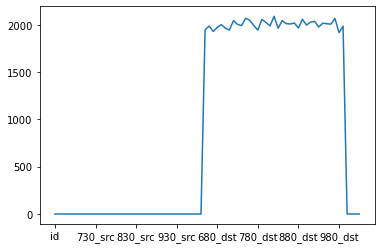

In [22]:
train.isnull().sum().plot() #전체 데이터 량 중 빈값 알아보기 

In [23]:
#오늘 할 것은 빈 값을 채우는 방법. 다양한 방법이 있으나, 오늘은 그중 한가지 방법을 사용하여 넣는다.

#1. 선형회귀를 통해 빈값을 평균치로 채워넣는 작업. interpolation
#2. 양 끝자리 값이 없을 경우 평균치 환산이 어려우니 바로 옆의 값을 차용하겠다. 
# 위의 2가지 방법을 통해 값을 채워 넣는다. 

In [24]:
train.columns

Index(['id', 'rho', '650_src', '660_src', '670_src', '680_src', '690_src',
       '700_src', '710_src', '720_src', '730_src', '740_src', '750_src',
       '760_src', '770_src', '780_src', '790_src', '800_src', '810_src',
       '820_src', '830_src', '840_src', '850_src', '860_src', '870_src',
       '880_src', '890_src', '900_src', '910_src', '920_src', '930_src',
       '940_src', '950_src', '960_src', '970_src', '980_src', '990_src',
       '650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
       '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
       '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
       '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
       '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
       '950_dst', '960_dst', '970_dst', '980_dst', '990_dst', 'hhb', 'hbo2',
       'ca', 'na'],
      dtype='object')

In [25]:
column = [ '650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
           '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
           '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
           '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
           '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
           '950_dst', '960_dst', '970_dst', '980_dst', '990_dst']
#요렇게 컬럼을 뽑아내도 되지만 좀 노가다성이니...

In [183]:
#컬럼에 해당되는 것만 뽑아내기
train_dst = train.filter(regex = '_dst$', axis='columns')
train_dst

,650_dst,660_dst,670_dst,680_dst,690_dst,700_dst,710_dst,720_dst,730_dst,740_dst,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
0,2.447758e-18,1.894578e-18,0.000000e+00,6.412913e-18,1.098559e-17,8.907142e-19,NaN,0.000000e+00,NaN,0.000000e+00,...,NaN,3.527371e-18,NaN,6.455564e-19,NaN,0.000000e+00,NaN,1.067504e-18,5.998949e-18,4.378513e-17
1,0.000000e+00,0.000000e+00,0.000000e+00,1.995530e-10,1.025259e-10,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,...,2.647633e-09,NaN,5.233480e-09,1.264238e-08,1.343132e-08,6.112685e-09,2.130547e-09,NaN,9.710091e-09,NaN
2,1.677445e-19,3.763590e-20,NaN,0.000000e+00,NaN,NaN,8.981651e-19,1.944683e-19,8.126907e-19,2.183200e-19,...,4.629125e-18,1.409413e-18,3.237480e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.329725e-18,NaN
3,4.044975e-11,NaN,5.345363e-11,9.106886e-12,1.881458e-11,3.617201e-11,7.909656e-13,NaN,1.583839e-10,NaN,...,1.274876e-10,6.118947e-11,NaN,1.663888e-10,2.245998e-10,1.299511e-10,7.782625e-11,NaN,4.088921e-10,NaN
4,4.784751e-14,NaN,0.000000e+00,1.153089e-13,0.000000e+00,0.000000e+00,1.056991e-13,0.000000e+00,0.000000e+00,2.666663e-14,...,0.000000e+00,NaN,1.537619e-14,4.996522e-14,1.457955e-13,8.769053e-14,NaN,1.330237e-13,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.728013e-15,1.438586e-14,0.000000e+00,0.000000e+00,NaN,3.883500e-14,1.111576e-14,4.196881e-14,0.000000e+00,1.406853e-14,...,0.000000e+00,2.314357e-15,2.694142e-15,NaN,6.788642e-16,0.000000e+00,5.516467e-16,9.690979e-16,1.391635e-15,5.460702e-14
9996,NaN,3.021131e-17,0.000000e+00,NaN,0.000000e+00,8.445801e-18,NaN,3.789188e-17,0.000000e+00,0.000000e+00,...,2.011769e-16,NaN,1.644859e-17,6.861706e-17,1.814274e-16,1.117148e-16,7.352416e-17,NaN,5.825347e-16,4.226436e-15
9997,7.248393e-12,0.000000e+00,2.125747e-11,1.364016e-11,1.018564e-11,0.000000e+00,0.000000e+00,5.944397e-12,1.017627e-11,4.223636e-12,...,6.898068e-11,NaN,NaN,6.473638e-11,4.828451e-11,3.110419e-11,8.119095e-12,NaN,1.504115e-10,4.003657e-10
9998,1.629438e-13,NaN,1.531261e-14,8.313464e-14,3.306053e-13,0.000000e+00,0.000000e+00,1.108741e-13,0.000000e+00,NaN,...,NaN,3.149953e-13,4.371711e-14,NaN,3.279271e-13,0.000000e+00,4.475946e-14,NaN,2.818857e-12,1.408742e-11


In [184]:
train_dst.columns

Index(['650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
       '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
       '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
       '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
       '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
       '950_dst', '960_dst', '970_dst', '980_dst', '990_dst'],
      dtype='object')

<AxesSubplot:>

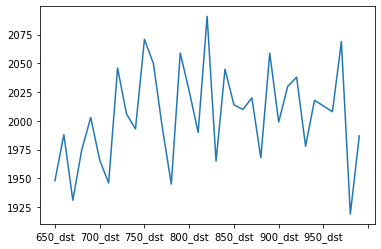

In [185]:
#선택 컬럼의 빈값 찾아보기
train.filter(regex = '_dst$', axis='columns').isnull().sum().plot()

<AxesSubplot:>

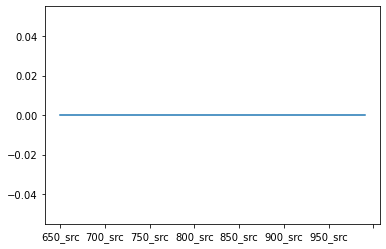

In [186]:
#src는 빈값이 없다.
train.filter(regex = '_src$', axis='columns').isnull().sum().plot()

In [187]:
#전치행렬을 통해 인덱스와 컬럼위치를 바꾸어 좀더 그래프 시각화가 쉽도록 해보자.
train.filter(regex = '_dst$', axis='columns').head().T

,0,1,2,3,4
650_dst,2.447758e-18,0.000000e+00,1.677445e-19,4.044975e-11,4.784751e-14
660_dst,1.894578e-18,0.000000e+00,3.763590e-20,NaN,NaN
670_dst,0.000000e+00,0.000000e+00,NaN,5.345363e-11,0.000000e+00
680_dst,6.412913e-18,1.995530e-10,0.000000e+00,9.106886e-12,1.153089e-13
690_dst,1.098559e-17,1.025259e-10,NaN,1.881458e-11,0.000000e+00
700_dst,8.907142e-19,0.000000e+00,NaN,3.617201e-11,0.000000e+00
710_dst,NaN,0.000000e+00,8.981651e-19,7.909656e-13,1.056991e-13
720_dst,0.000000e+00,0.000000e+00,1.944683e-19,NaN,0.000000e+00
730_dst,NaN,NaN,8.126907e-19,1.583839e-10,0.000000e+00
740_dst,0.000000e+00,0.000000e+00,2.183200e-19,NaN,2.666663e-14


<AxesSubplot:>

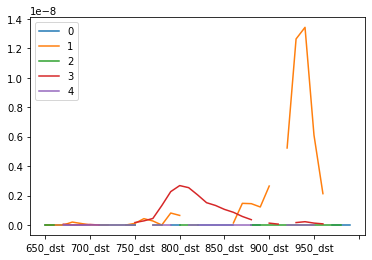

In [188]:
#그래프의 어디가 비었으며 어디를 채워야 할지 잘 알 수 있다. 
train.filter(regex = '_dst$', axis='columns').head().T.plot() 

<AxesSubplot:>

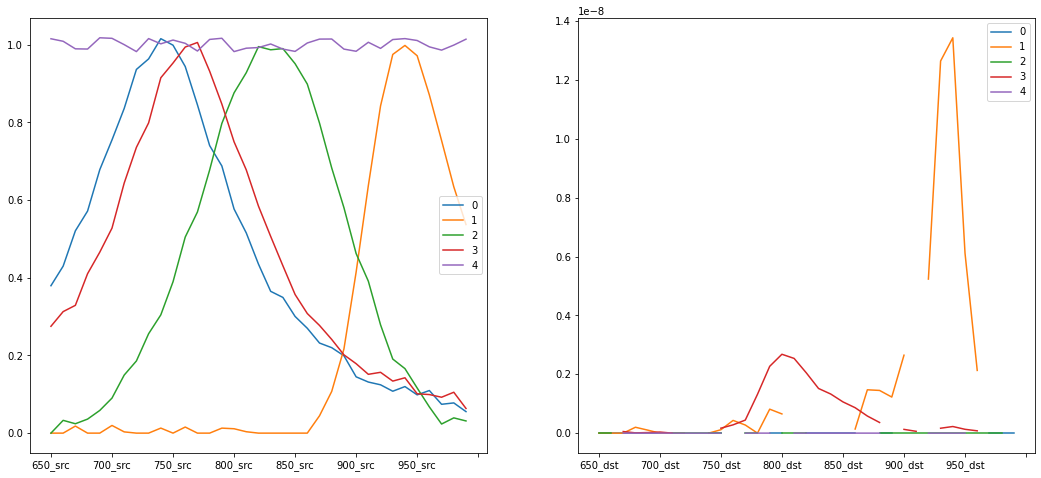

In [189]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,8)
train.filter(regex='_src$', axis='columns').head().T.plot(ax=ax1) #플롯안에 axis넣어줘도됨. 
train.filter(regex='_dst$', axis='columns').head().T.plot(ax=ax2)

In [190]:
#2번 빛은 그래프 선이 거의 바닥에 있으므로 흡수가 잘 되고 1번 빛은 투과가 많이 됨을 알수 있음. 
#4번의 경우 다른 hhb, hbo2, ca, na 중 한개의 영향을 받아 저런식으로 그래프가 나옴을 유추.

In [191]:
#인터폴레이션(보간,간격을 보)-그래프의 빈값을 평균값을 넣어 채워보자! 
#제일 쉬운 방식 -> 직선 인터폴레이션 

<AxesSubplot:>

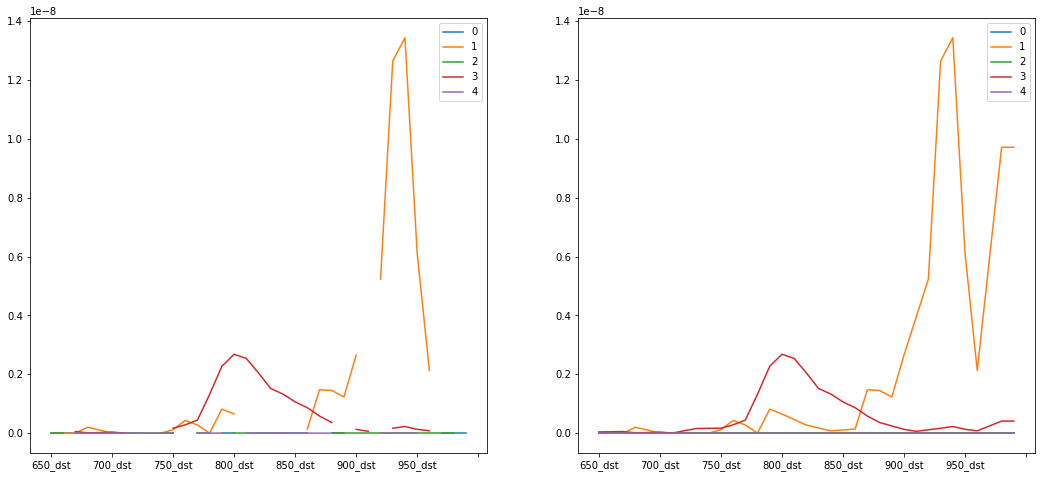

In [192]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,8)
train.filter(regex='_dst$', axis='columns').head().T.plot(ax=ax1)
train.filter(regex='_dst$', axis='columns').head().T.interpolate(method='linear',axis=0).plot(ax=ax2)
#곡선화는 컬럼명을 숫자로 바꾸어주어야 작동가능 linear를 spline으로 

In [193]:
train_dst.columns

Index(['650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
       '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
       '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
       '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
       '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
       '950_dst', '960_dst', '970_dst', '980_dst', '990_dst'],
      dtype='object')

In [194]:
np.arange(35) *10 + 650 #배열로 만들어 진것을 리스트로 바꾸어 보자 

array([650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770,
       780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900,
       910, 920, 930, 940, 950, 960, 970, 980, 990])

In [195]:
list(np.arange(35) *10 + 650)

[650,
 660,
 670,
 680,
 690,
 700,
 710,
 720,
 730,
 740,
 750,
 760,
 770,
 780,
 790,
 800,
 810,
 820,
 830,
 840,
 850,
 860,
 870,
 880,
 890,
 900,
 910,
 920,
 930,
 940,
 950,
 960,
 970,
 980,
 990]

In [196]:
#dst값을 치환하기 
train_dst = train.filter(regex = '_dst', axis = 'columns')
train_dst.columns = list(np.arange(35) *10 + 650)
train_dst.columns

Int64Index([650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770,
            780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900,
            910, 920, 930, 940, 950, 960, 970, 980, 990],
           dtype='int64')

<AxesSubplot:>

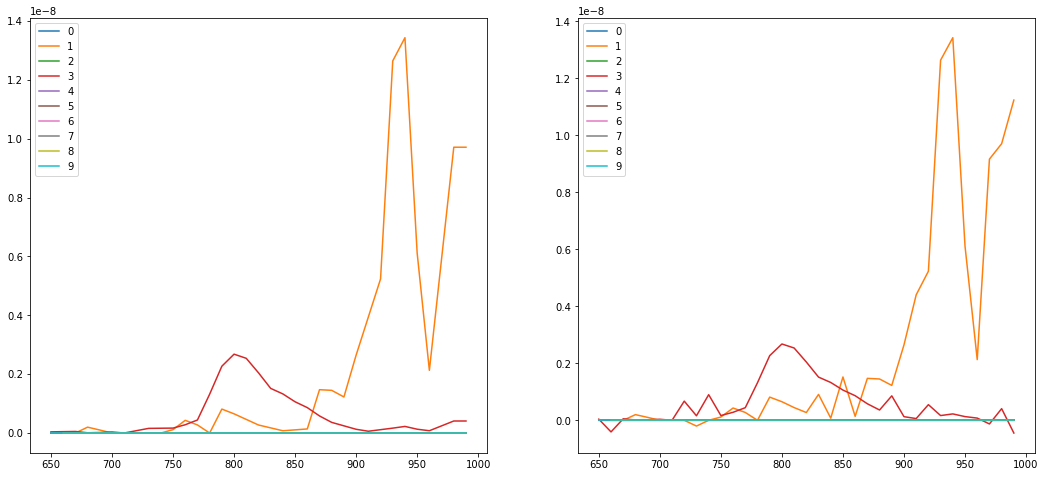

In [197]:
#이제 컬럼을 바꾸었으니 곡선화 해보자 order=곡률 
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,8)
#직선화
train_dst.interpolate(method='linear', axis=1).head(10).T.plot(ax=ax1)
#곡선화
train_dst.interpolate(method='spline', order = 3, axis=1).head(10).T.plot(ax=ax2)

<AxesSubplot:>

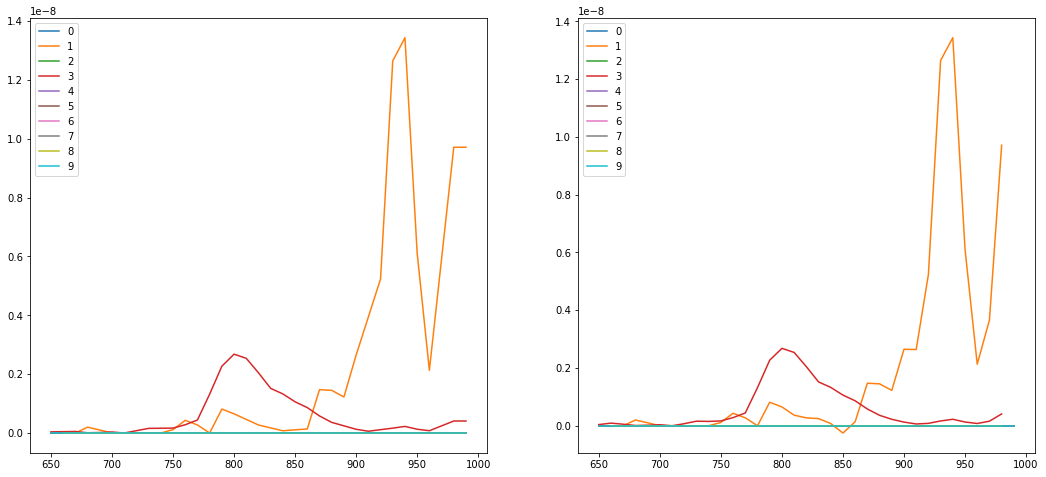

In [198]:
# 좀 더 완화된 곡선으로 표현해본다면?
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,8)
#직선화
train_dst.interpolate(method='linear', axis=1).head(10).T.plot(ax=ax1)
#곡선화.
train_dst.interpolate(method='polynomial', order = 3, axis=1).head(10).T.plot(ax=ax2)

<AxesSubplot:>

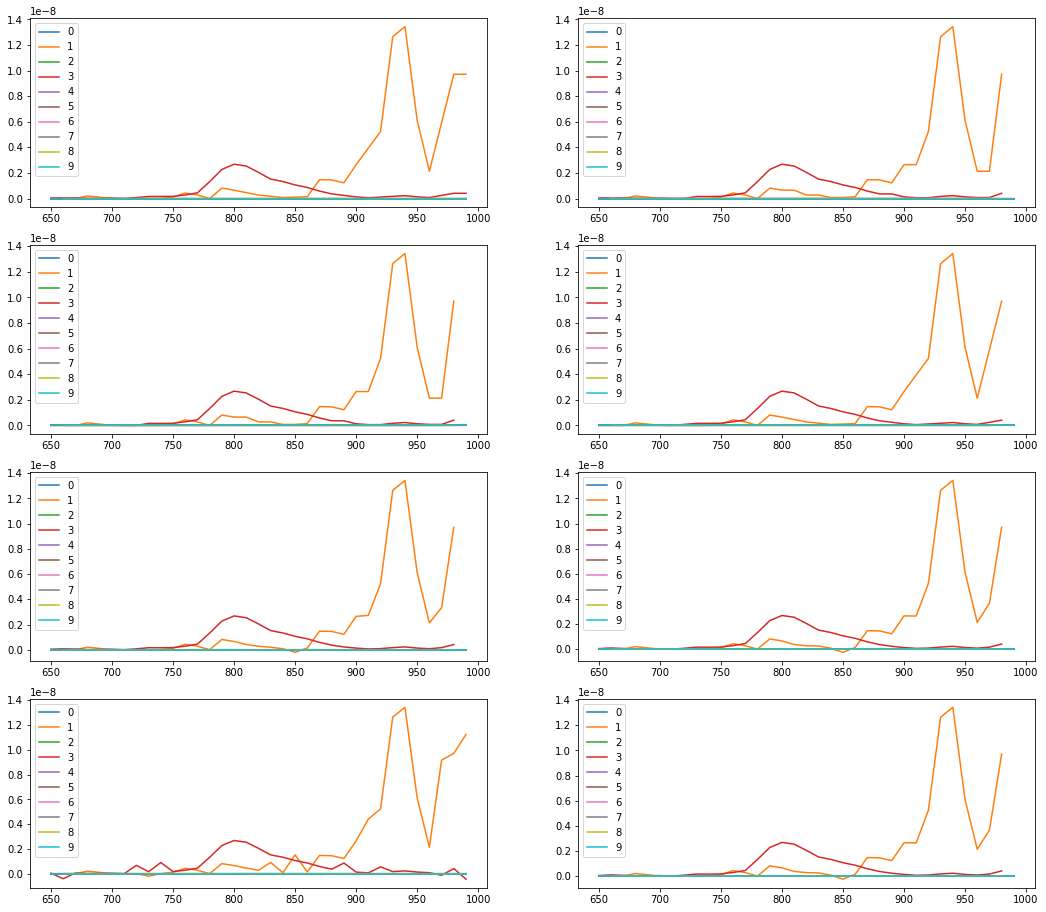

In [199]:
#6개의 그래프를 만들어 보자.

figure, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)

i = 10

#직선화
train_dst.interpolate(method='linear', axis=1).head(i).T.plot(ax=ax1)
#바로 옆 값을 차용하는 것.
train_dst.interpolate(method='nearest', axis=1).head(i).T.plot(ax=ax2)
#위의 반대.
train_dst.interpolate(method='zero', axis=1).head(i).T.plot(ax=ax3)
train_dst.interpolate(method='slinear', axis=1).head(i).T.plot(ax=ax4)

#쿼드라틱 - 곡선을 흉내낸 직선 좀 완
train_dst.interpolate(method='quadratic', axis=1).head(i).T.plot(ax=ax5)
#큐빅- 곡선을 흉내낸 직선 좀 급 
train_dst.interpolate(method='cubic', axis=1).head(i).T.plot(ax=ax6)

#곡선화 2개 
train_dst.interpolate(method='spline', order = 3, axis=1).head(i).T.plot(ax=ax7)
train_dst.interpolate(method='polynomial', order = 3, axis=1).head(i).T.plot(ax=ax8)


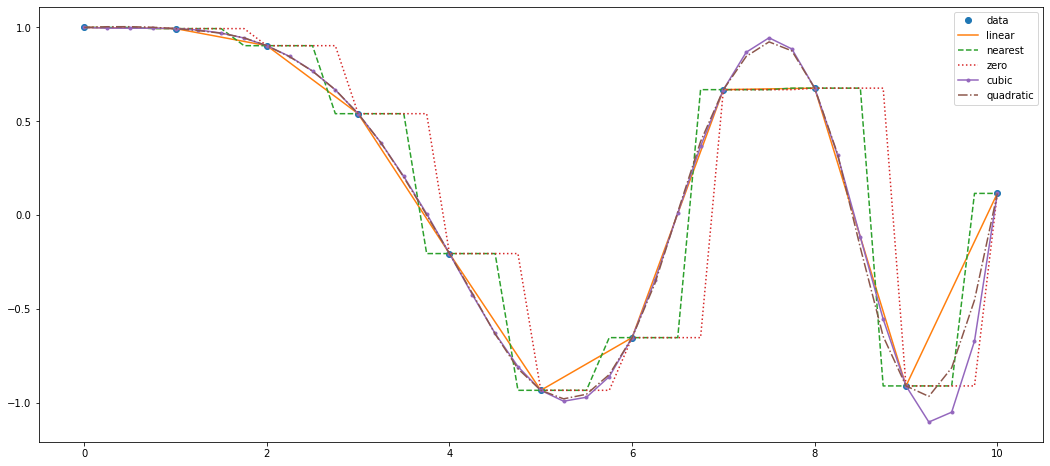

In [200]:
# interp1d => 인터폴레이션 1 디멘드 , 그래프로 그려서 데이터가 어떻게 찍히는지 좀더 자세히 살펴보자. 
# 곡선화는 지원하지 않음. 
from scipy.interpolate import interp1d

#x축과 y축으로 그래프 생성. 
x = np.linspace(0, 10, num=11, endpoint = True)
y = np.cos(-x**2/9)

f = interp1d(x, y) #아무 값도 넣지 않으면 linear 직선화
f2 = interp1d(x, y, kind = 'nearest' )
f3 = interp1d(x, y, kind = 'zero' )
f4 = interp1d(x, y, kind = 'cubic' )
f5 = interp1d(x, y, kind = 'quadratic' )

xnew = np.linspace(0, 10, num=41, endpoint = True)

plt.figure(figsize=(18,8))
#중간 문자열은 점선의 모양.
plt.plot(x,y,'o', xnew, f(xnew), '-', xnew, f2(xnew), '--', xnew, f3(xnew), ':', xnew, f4(xnew), '.-', xnew, f5(xnew), '-.')
plt.legend(['data','linear','nearest','zero','cubic','quadratic'], loc = 'best')
plt.show()

In [201]:
#컬럼값을 숫자로 변경하여 데이터 채운 것을 다시 원상태로 변경하자!

In [202]:
train.filter(regex='_dst$',axis="columns").columns

Index(['650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
       '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
       '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
       '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
       '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
       '950_dst', '960_dst', '970_dst', '980_dst', '990_dst'],
      dtype='object')

In [203]:
train_dst_i = train_dst.interpolate(method = 'linear', axis=1)
train_dst_i.columns

Int64Index([650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770,
            780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900,
            910, 920, 930, 940, 950, 960, 970, 980, 990],
           dtype='int64')

In [204]:
#spline, polynomial 사용시 interpolate 괄호안에 order = 숫자 를 넣어야함. 
#ex) interpolate(method = 'polynomial', axis=1, order =3)
train_dst_i = train_dst.interpolate(method = 'linear', axis=1) #linear 보간을 완료 , linear이나 쓰고 싶은것으로. 
#대신 곡선화는 order추가해주어야함. axis뒤에 order
train_dst_i.columns = train.filter(regex='_dst$',axis="columns").columns #숫자 컬럼에서 dst 문자컬럼으로 변경 
train_dst_i.columns

Index(['650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
       '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
       '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
       '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
       '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
       '950_dst', '960_dst', '970_dst', '980_dst', '990_dst'],
      dtype='object')

In [205]:
test = pd.read_csv('test.csv')
test

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
0,10000,15,0.15406,0.23275,0.30977,0.42949,0.51264,0.62558,0.74340,0.85418,...,0.000000e+00,0.000000e+00,1.432248e-14,0.000000e+00,0.000000e+00,6.332117e-15,1.429966e-14,0.000000e+00,NaN,7.320236e-14
1,10001,15,0.48552,0.56939,0.67575,0.79089,0.85114,0.92581,0.98071,0.98177,...,1.036013e-13,NaN,2.830975e-14,1.114337e-13,4.825731e-14,NaN,2.282485e-14,7.348414e-14,1.259055e-13,2.349874e-13
2,10002,10,0.46883,0.56085,0.62442,0.73172,0.81724,0.91517,0.94801,0.99108,...,NaN,NaN,NaN,NaN,1.569208e-11,6.242378e-12,NaN,1.219010e-11,NaN,NaN
3,10003,10,0.06905,0.07517,0.10226,0.14905,0.16182,0.19659,0.26085,0.36753,...,1.651177e-11,7.282747e-12,5.010879e-12,NaN,1.571023e-11,0.000000e+00,0.000000e+00,3.304247e-12,4.106134e-11,NaN
4,10004,25,0.00253,0.00757,0.01649,0.00128,0.00000,0.00000,0.00105,0.01975,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.732057e-17,4.110605e-17,0.000000e+00,0.000000e+00,1.910775e-16,2.215673e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19995,15,0.04334,0.03279,0.05853,0.04070,0.07704,0.07859,0.06168,0.08903,...,7.889599e-13,NaN,4.903209e-13,1.365078e-12,7.929664e-13,0.000000e+00,0.000000e+00,1.472213e-13,1.479745e-12,5.391520e-12
9996,19996,25,0.00020,0.02009,0.01726,0.03816,0.08300,0.08681,0.15300,0.18099,...,1.240848e-17,6.258180e-18,8.693704e-20,NaN,4.514449e-18,NaN,9.128300e-19,NaN,3.928314e-18,2.586781e-17
9997,19997,15,0.00000,0.00000,0.00120,0.00000,0.04347,0.14882,0.40883,0.80365,...,0.000000e+00,NaN,0.000000e+00,2.610282e-14,7.789652e-15,NaN,1.271388e-15,1.436617e-15,0.000000e+00,1.743751e-13
9998,19998,20,0.08390,0.05690,0.08343,0.12324,0.12720,0.16732,0.18149,0.23766,...,0.000000e+00,7.084232e-18,NaN,0.000000e+00,2.669004e-18,8.586549e-18,0.000000e+00,4.489194e-18,2.892986e-17,NaN


In [206]:
#test파일을 보간하여 보자. 
test_dst = test.filter(regex='_dst$', axis="columns")
test_dst_i = test_dst.interpolate(method = 'linear', axis=1) #linear 보간을 완료 , linear이나 쓰고 싶은것으로. 
test_dst_i.columns = test.filter(regex='_dst$',axis="columns").columns #숫자 컬럼에서 dst 문자컬럼으로 변경 
test_dst_i.columns

Index(['650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
       '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
       '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
       '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
       '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
       '950_dst', '960_dst', '970_dst', '980_dst', '990_dst'],
      dtype='object')

<AxesSubplot:>

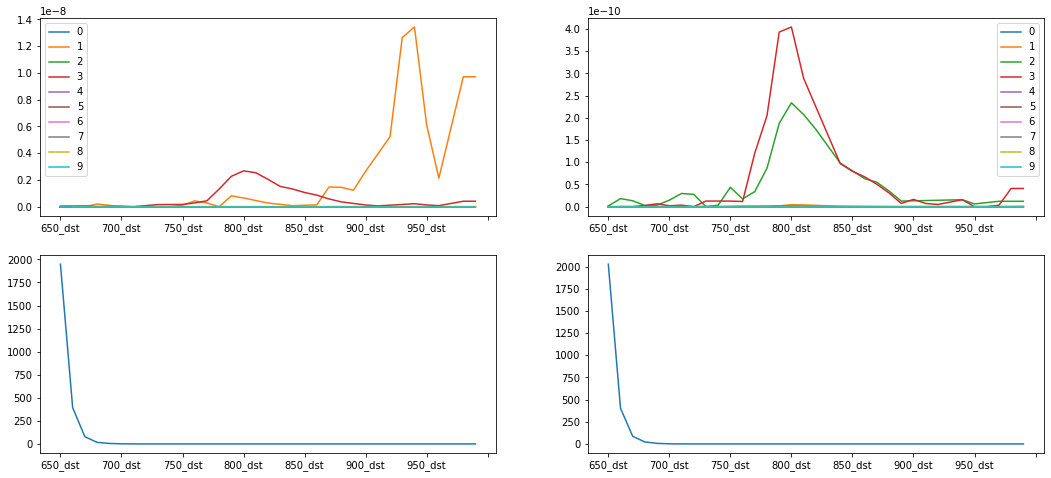

In [50]:
#위에 보간한 값이 제대로 잘 변경 되었는 지 확인해 보자.
figure, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,8)

i = 10

train_dst_i.head(i).T.plot(ax=ax1)
test_dst_i.head(i).T.plot(ax=ax2)

#보간 후 오류로 빈값 찾기
train_dst_i.isna().sum().plot(ax=ax3)
test_dst_i.isna().sum().plot(ax=ax4)

In [51]:
# 650 부분이 보간이 안된 이유는?
# 보간은 사이사이 점을 이어주는 것인데 이을 점이 없으니 값을 채울 수 없음. 
# 값을 채우는 여러 방법이 있는데 시간이 없으니 수평으로 연결하여 값을 채워보자. 
# for와 rock을 이용해보자


In [207]:
#데이터 나라시 . 평탄화 작업. 그전 값에서 받아서 채워넣기.

# for i in range() => f{i}_dst -> 문자열 안에 함수를 넣기 
# 34부터 시작하는 이유 980부터 시작하려고 
# 990에 있는 값을 비어있으면 980에 채워넣어라. 
for i in range(34):  
    train_dst_i.loc[train_dst_i[f'{980-(i*10)}_dst'].isna(),
                    f'{980-(i*10)}_dst'] = train_dst_i.loc[train_dst_i[f'{980-(i*10)}_dst'].isna(),
                                                           f'{990-(i*10)}_dst']
    test_dst_i.loc[test_dst_i[f'{980-(i*10)}_dst'].isna(),
                   f'{980-(i*10)}_dst'] = test_dst_i.loc[test_dst_i[f'{980-(i*10)}_dst'].isna(),
                                                         f'{990-(i*10)}_dst']

<AxesSubplot:>

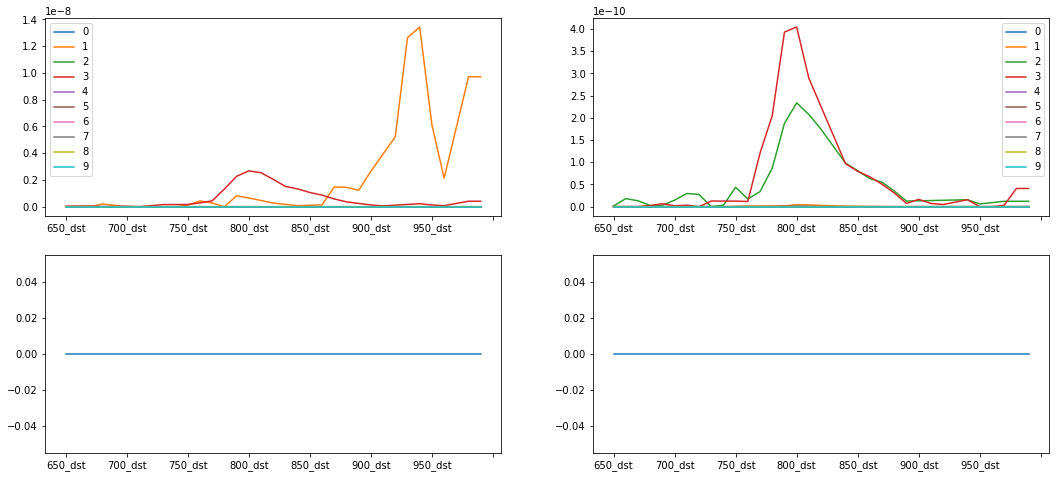

In [53]:
figure, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,8)

i = 10

train_dst_i.head(i).T.plot(ax=ax1)
test_dst_i.head(i).T.plot(ax=ax2)

#보간 후 빈값 여부 확인. 
train_dst_i.isna().sum().plot(ax=ax3)
test_dst_i.isna().sum().plot(ax=ax4)

In [208]:
#변형된 값을 원본에 업데이트 하기
train.update(train_dst_i)
train

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst,hhb,hbo2,ca,na
0,0,25,0.37950,0.42993,0.52076,0.57166,0.67818,0.75476,0.83580,0.93623,...,3.227782e-19,0.000000e+00,5.337522e-19,1.067504e-18,5.998949e-18,4.378513e-17,5.59,4.32,8.92,4.29
1,1,10,0.00000,0.00000,0.01813,0.00000,0.00000,0.01974,0.00321,0.00000,...,1.343132e-08,6.112685e-09,2.130547e-09,5.920319e-09,9.710091e-09,9.710091e-09,0.00,2.83,7.25,4.64
2,2,25,0.00000,0.03289,0.02416,0.03610,0.05843,0.09015,0.14944,0.18578,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.329725e-18,1.329725e-18,10.64,3.00,8.40,5.16
3,3,10,0.27503,0.31281,0.32898,0.41041,0.46587,0.52769,0.64369,0.73562,...,2.245998e-10,1.299511e-10,7.782625e-11,2.433592e-10,4.088921e-10,4.088921e-10,5.67,4.01,5.05,4.35
4,4,15,1.01521,1.00872,0.98930,0.98874,1.01773,1.01632,1.00009,0.98217,...,1.457955e-13,8.769053e-14,1.103571e-13,1.330237e-13,1.330237e-13,1.330237e-13,11.97,4.41,10.78,2.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,15,0.23929,0.30265,0.39929,0.51000,0.64072,0.77328,0.86722,0.95891,...,6.788642e-16,0.000000e+00,5.516467e-16,9.690979e-16,1.391635e-15,5.460702e-14,12.68,4.11,12.31,0.10
9996,9996,20,0.02583,0.00946,0.03650,0.01380,0.04093,0.04363,0.03260,0.05282,...,1.814274e-16,1.117148e-16,7.352416e-17,3.280294e-16,5.825347e-16,4.226436e-15,8.46,4.11,10.46,3.12
9997,9997,10,0.57589,0.62976,0.70571,0.77248,0.85402,0.92796,0.97691,0.98933,...,4.828451e-11,3.110419e-11,8.119095e-12,7.926532e-11,1.504115e-10,4.003657e-10,9.84,3.20,10.45,2.06
9998,9998,15,1.01477,1.01504,0.99125,0.98747,1.00717,1.01434,0.99529,1.01322,...,3.279271e-13,0.000000e+00,4.475946e-14,1.431808e-12,2.818857e-12,1.408742e-11,6.38,4.06,11.28,4.03


In [209]:
test.update(test_dst_i)
test

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
0,10000,15,0.15406,0.23275,0.30977,0.42949,0.51264,0.62558,0.74340,0.85418,...,0.000000e+00,0.000000e+00,1.432248e-14,0.000000e+00,0.000000e+00,6.332117e-15,1.429966e-14,0.000000e+00,3.660118e-14,7.320236e-14
1,10001,15,0.48552,0.56939,0.67575,0.79089,0.85114,0.92581,0.98071,0.98177,...,1.036013e-13,6.595554e-14,2.830975e-14,1.114337e-13,4.825731e-14,3.554108e-14,2.282485e-14,7.348414e-14,1.259055e-13,2.349874e-13
2,10002,10,0.46883,0.56085,0.62442,0.73172,0.81724,0.91517,0.94801,0.99108,...,1.325728e-11,1.386598e-11,1.447468e-11,1.508338e-11,1.569208e-11,6.242378e-12,9.216241e-12,1.219010e-11,1.219010e-11,1.219010e-11
3,10003,10,0.06905,0.07517,0.10226,0.14905,0.16182,0.19659,0.26085,0.36753,...,1.651177e-11,7.282747e-12,5.010879e-12,1.036055e-11,1.571023e-11,0.000000e+00,0.000000e+00,3.304247e-12,4.106134e-11,4.106134e-11
4,10004,25,0.00253,0.00757,0.01649,0.00128,0.00000,0.00000,0.00105,0.01975,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.732057e-17,4.110605e-17,0.000000e+00,0.000000e+00,1.910775e-16,2.215673e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19995,15,0.04334,0.03279,0.05853,0.04070,0.07704,0.07859,0.06168,0.08903,...,7.889599e-13,6.396404e-13,4.903209e-13,1.365078e-12,7.929664e-13,0.000000e+00,0.000000e+00,1.472213e-13,1.479745e-12,5.391520e-12
9996,19996,25,0.00020,0.02009,0.01726,0.03816,0.08300,0.08681,0.15300,0.18099,...,1.240848e-17,6.258180e-18,8.693704e-20,2.300693e-18,4.514449e-18,2.713640e-18,9.128300e-19,2.420572e-18,3.928314e-18,2.586781e-17
9997,19997,15,0.00000,0.00000,0.00120,0.00000,0.04347,0.14882,0.40883,0.80365,...,0.000000e+00,0.000000e+00,0.000000e+00,2.610282e-14,7.789652e-15,4.530520e-15,1.271388e-15,1.436617e-15,0.000000e+00,1.743751e-13
9998,19998,20,0.08390,0.05690,0.08343,0.12324,0.12720,0.16732,0.18149,0.23766,...,0.000000e+00,7.084232e-18,3.542116e-18,0.000000e+00,2.669004e-18,8.586549e-18,0.000000e+00,4.489194e-18,2.892986e-17,2.892986e-17


<AxesSubplot:>

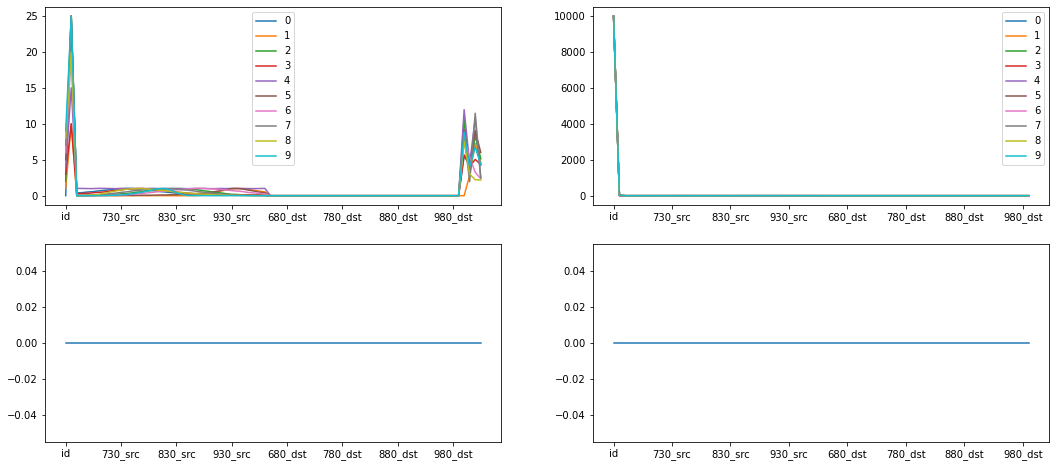

In [56]:
figure, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,8)

i = 10

train.head(i).T.plot(ax=ax1)
test.head(i).T.plot(ax=ax2)
# 원본 빈값 여부 확인. 
train.isna().sum().plot(ax=ax3)
test.isna().sum().plot(ax=ax4)

In [57]:
#id 값이 치솟은 이유는 test의 id 값이 10000부터 시작하므로.

In [210]:
#램버트 비어 법칙을 적용한 New columns을 만들어 보자.
#입실론 * c 를 ratio컬럼으로 

for i in range(35):
    train[f'{650+(i*10)}_ratio'] = np.log(train[f'{650+(i*10)}_src']/train[f'{650+(i*10)}_dst']) / (0.1*train['rho'])
    test[f'{650+(i*10)}_ratio'] = np.log(test[f'{650+(i*10)}_src']/test[f'{650+(i*10)}_dst']) / (0.1*test['rho'])

<AxesSubplot:>

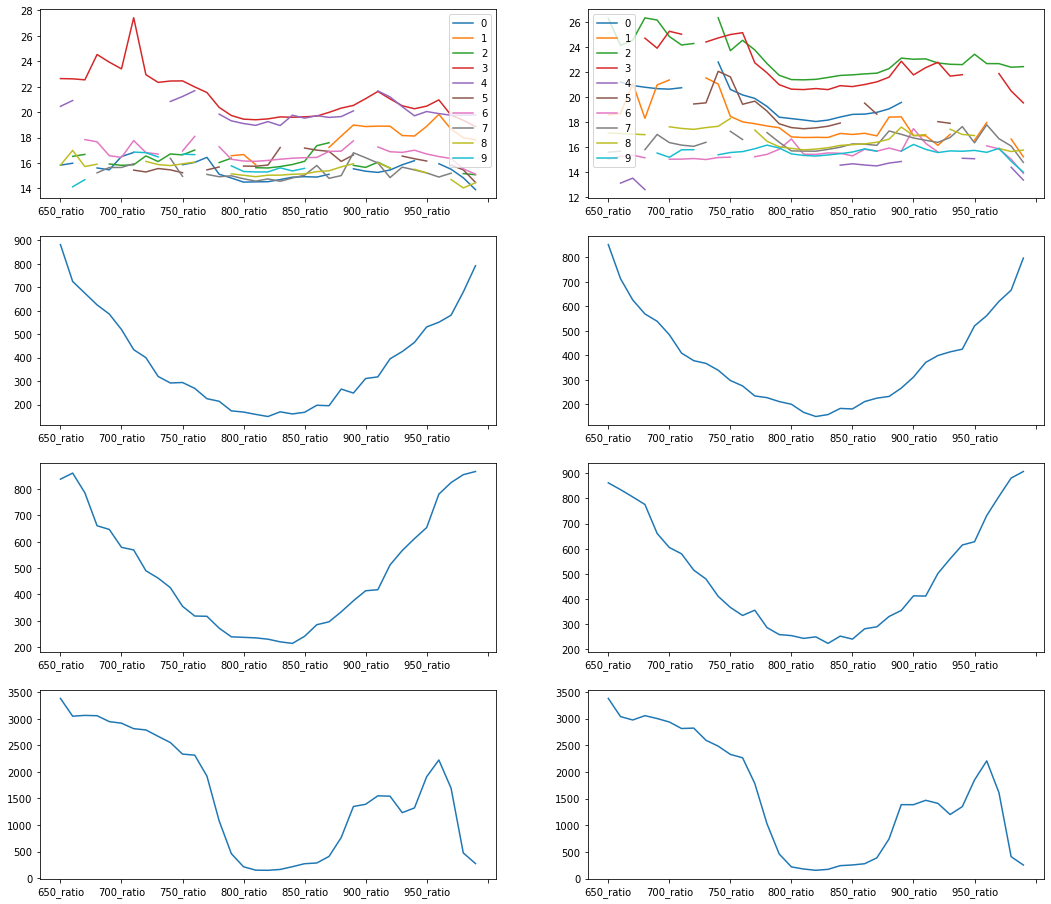

In [59]:
#만들어진 컬럼의 빈값을 찾아서 채워 넣도록 해보자! => 분자 분모에 0인 값이 있어서 inf값이 도출 되므로, 얘네를 빈값으로 만들고
#보간해주어야 한다.  
#보간 전에 값이 비는지 한번 확인해보자! 

figure, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)

i = 10


#전체 그래프를 그려라
train.filter(regex='ratio$', axis='columns').head(i).T.plot(ax=ax1)
test.filter(regex='ratio$', axis='columns').head(i).T.plot(ax=ax2)

#빈값만 찾아서 그려라
train.filter(regex='ratio$', axis='columns').isna().sum().plot(ax=ax3)
test.filter(regex='ratio$', axis='columns').isna().sum().plot(ax=ax4)

#-inf 값을 찾은 후 그려라 
train.filter(regex='ratio$', axis='columns').isin([float('-inf')]).sum().plot(ax=ax5)
test.filter(regex='ratio$', axis='columns').isin([float('-inf')]).sum().plot(ax=ax6)

#inf 값을 찾은 후 그려라 
train.filter(regex='ratio$', axis='columns').isin([float('inf')]).sum().plot(ax=ax7)
test.filter(regex='ratio$', axis='columns').isin([float('inf')]).sum().plot(ax=ax8)


In [60]:
#첫째 줄은 빈값이거나 무한인 값이 끊겨서 비어서 나옴

In [211]:
#- + inf 값을 빈값으로 변환 시켜보자

train_r = train.filter(regex='_ratio$',axis='columns').replace(float('-inf'),np.nan).replace(float('inf'),np.nan)
test_r = test.filter(regex='_ratio$',axis='columns').replace(float('-inf'),np.nan).replace(float('inf'),np.nan)

In [212]:
#변환 된것이 제대로 된 것인지 확인해 보자. 

<AxesSubplot:>

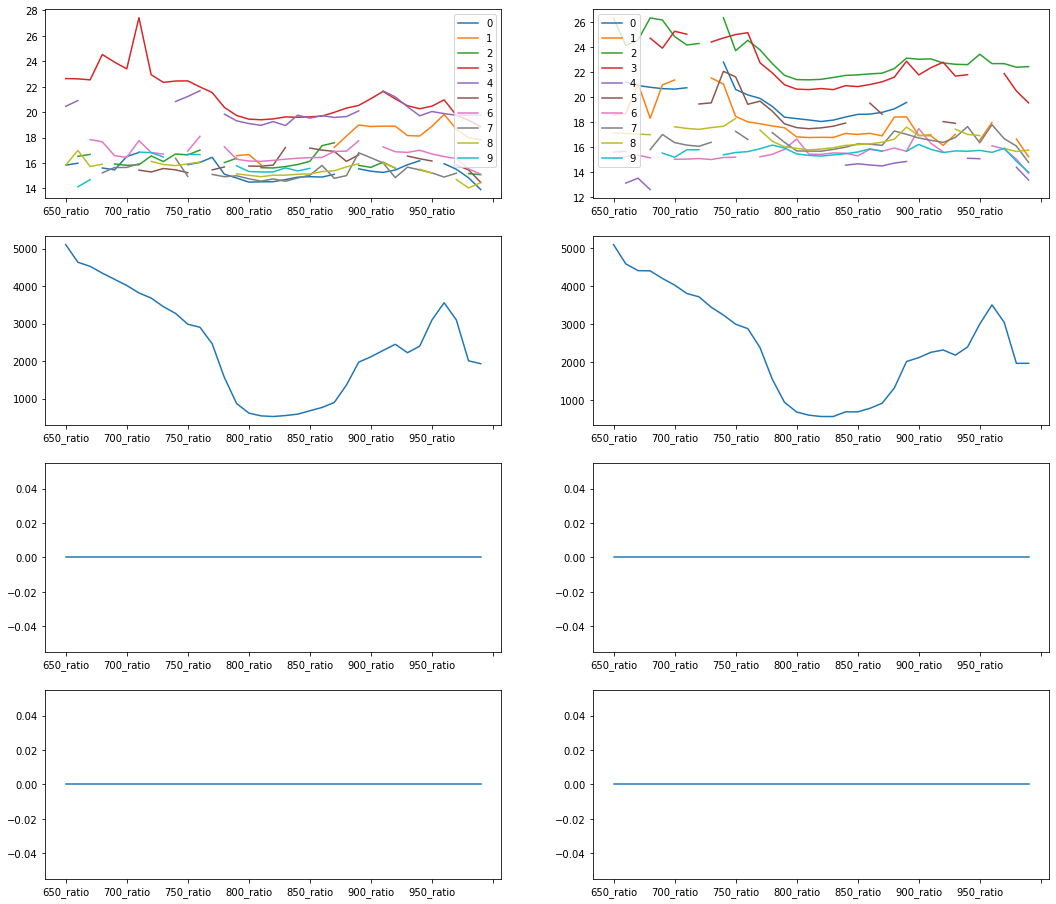

In [63]:
figure, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)

i = 10
#필터 빼는 이유 train.r이 이미 필터 한번 한 것.
#전체 그래프를 그려라
train_r.head(i).T.plot(ax=ax1)
test_r.head(i).T.plot(ax=ax2)
#빈값만 찾아서 그려라
train_r.isna().sum().plot(ax=ax3)
test_r.isna().sum().plot(ax=ax4)
#-inf 값을 찾은 후 그려라 
train_r.isin([float('-inf')]).sum().plot(ax=ax5)
test_r.isin([float('-inf')]).sum().plot(ax=ax6)
#inf 값을 찾은 후 그려라 
train_r.isin([float('inf')]).sum().plot(ax=ax7)
test_r.isin([float('inf')]).sum().plot(ax=ax8)

In [64]:
# 무한 값이 지워지고 빈값으로 변경되어 빈값이 늘어남.
# 이전의 inf 그래프와 닮은이유는? inf값이 제일 많아서 변경된 것이 반영되어서 그러하다. 

In [213]:
train_r.columns

Index(['650_ratio', '660_ratio', '670_ratio', '680_ratio', '690_ratio',
       '700_ratio', '710_ratio', '720_ratio', '730_ratio', '740_ratio',
       '750_ratio', '760_ratio', '770_ratio', '780_ratio', '790_ratio',
       '800_ratio', '810_ratio', '820_ratio', '830_ratio', '840_ratio',
       '850_ratio', '860_ratio', '870_ratio', '880_ratio', '890_ratio',
       '900_ratio', '910_ratio', '920_ratio', '930_ratio', '940_ratio',
       '950_ratio', '960_ratio', '970_ratio', '980_ratio', '990_ratio'],
      dtype='object')

In [214]:
#보간 하기 전 컬럼 명을 숫자로 바꾸어 주자
train_r.columns = list(650 + 10*np.arange(35))
test_r.columns = list(650 + 10*np.arange(35))

print(train_r.columns)
print(test_r.columns)

Int64Index([650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770,
            780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900,
            910, 920, 930, 940, 950, 960, 970, 980, 990],
           dtype='int64')
Int64Index([650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770,
            780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900,
            910, 920, 930, 940, 950, 960, 970, 980, 990],
           dtype='int64')


In [215]:
#컬럼을 보간
train_ratio = train_r.interpolate(method='linear',axis=1)
test_ratio = test_r.interpolate(method='linear',axis=1)

#컬럼명을 다시 원래대로 변경 해서 ratio로 변환.
train_ratio.columns = train.filter(regex='_ratio$', axis='columns').columns
test_ratio.columns = test.filter(regex='_ratio$', axis='columns').columns

#ratio로 새로 만들어 졌는지 확인해보자 . 
print(train_ratio.columns)
print(test_ratio.columns)

Index(['650_ratio', '660_ratio', '670_ratio', '680_ratio', '690_ratio',
       '700_ratio', '710_ratio', '720_ratio', '730_ratio', '740_ratio',
       '750_ratio', '760_ratio', '770_ratio', '780_ratio', '790_ratio',
       '800_ratio', '810_ratio', '820_ratio', '830_ratio', '840_ratio',
       '850_ratio', '860_ratio', '870_ratio', '880_ratio', '890_ratio',
       '900_ratio', '910_ratio', '920_ratio', '930_ratio', '940_ratio',
       '950_ratio', '960_ratio', '970_ratio', '980_ratio', '990_ratio'],
      dtype='object')
Index(['650_ratio', '660_ratio', '670_ratio', '680_ratio', '690_ratio',
       '700_ratio', '710_ratio', '720_ratio', '730_ratio', '740_ratio',
       '750_ratio', '760_ratio', '770_ratio', '780_ratio', '790_ratio',
       '800_ratio', '810_ratio', '820_ratio', '830_ratio', '840_ratio',
       '850_ratio', '860_ratio', '870_ratio', '880_ratio', '890_ratio',
       '900_ratio', '910_ratio', '920_ratio', '930_ratio', '940_ratio',
       '950_ratio', '960_ratio', '970_rat

<AxesSubplot:>

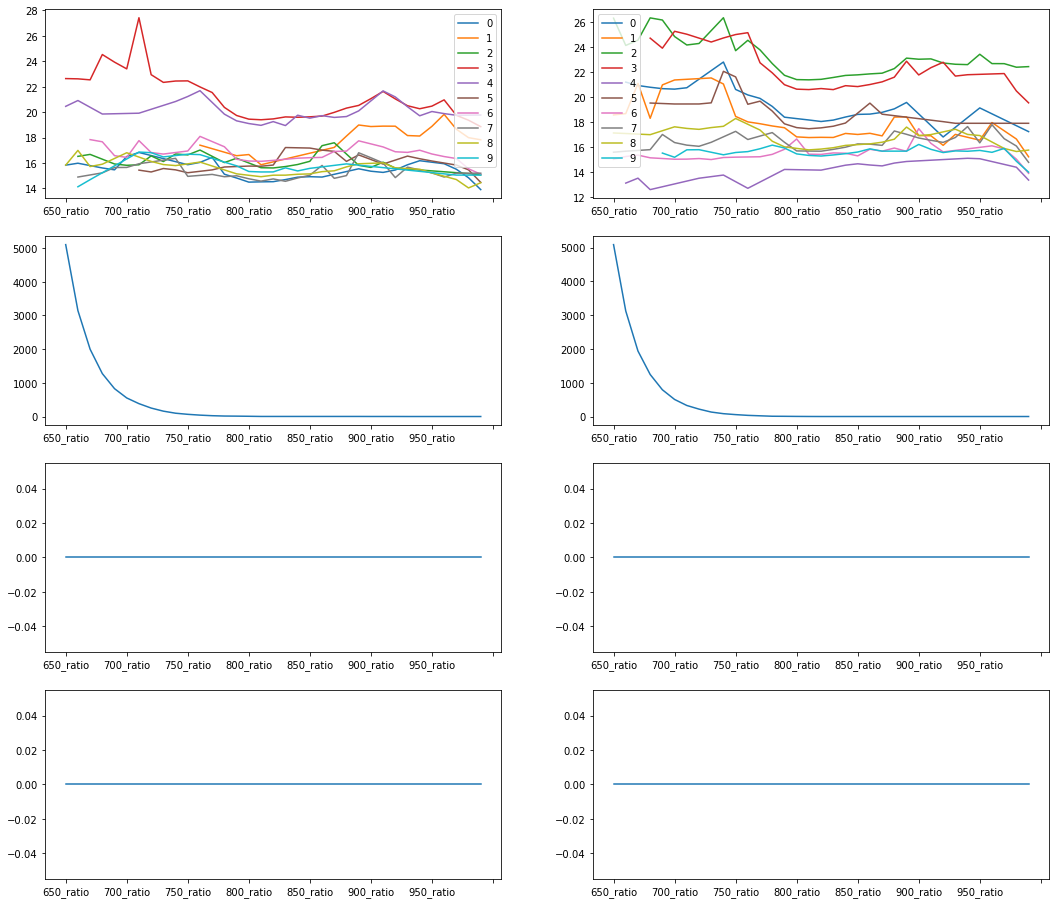

In [68]:
#그래프로 보간 확인해보자

figure, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)

i = 10

train_ratio.head(i).T.plot(ax=ax1)
test_ratio.head(i).T.plot(ax=ax2)
train_ratio.isna().sum().plot(ax=ax3)
test_ratio.isna().sum().plot(ax=ax4)
train_ratio.isin([float('-inf')]).sum().plot(ax=ax5)
test_ratio.isin([float('-inf')]).sum().plot(ax=ax6)
train_ratio.isin([float('inf')]).sum().plot(ax=ax7)
test_ratio.isin([float('inf')]).sum().plot(ax=ax8)

In [216]:
# 빈값을 이전 컬럼에서 가져와 채우는 단계
for i in range(34):  
    train_ratio.loc[train_ratio[f'{980-(i*10)}_ratio'].isna(),
                    f'{980-(i*10)}_ratio'] = train_ratio.loc[train_ratio[f'{980-(i*10)}_ratio'].isna(),
                                                           f'{990-(i*10)}_ratio']
    test_ratio.loc[test_ratio[f'{980-(i*10)}_ratio'].isna(),
                   f'{980-(i*10)}_ratio'] = test_ratio.loc[test_ratio[f'{980-(i*10)}_ratio'].isna(),
                                                         f'{990-(i*10)}_ratio']

<AxesSubplot:>

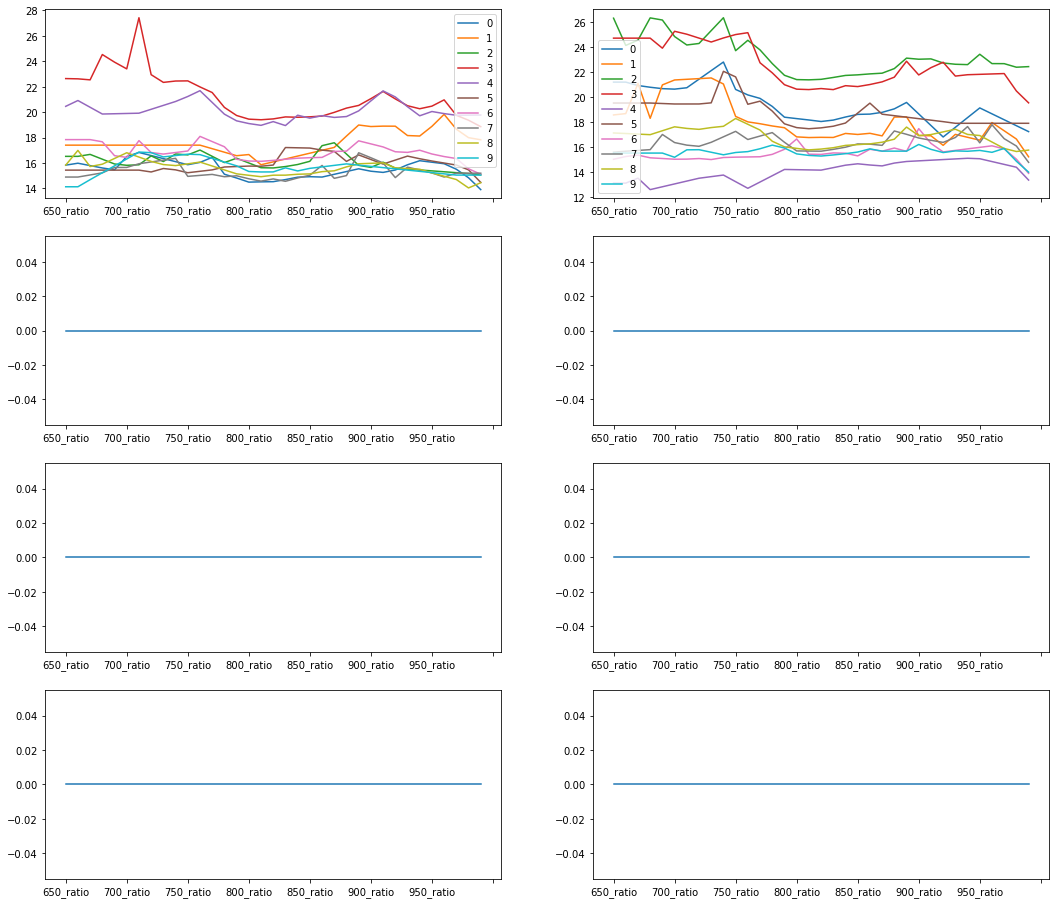

In [70]:
# 빈값이 채워 졌는지 최종적으로 확인해보자!
figure, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)

i = 10

train_ratio.head(i).T.plot(ax=ax1)
test_ratio.head(i).T.plot(ax=ax2)
train_ratio.isna().sum().plot(ax=ax3)
test_ratio.isna().sum().plot(ax=ax4)
train_ratio.isin([float('-inf')]).sum().plot(ax=ax5)
test_ratio.isin([float('-inf')]).sum().plot(ax=ax6)
train_ratio.isin([float('inf')]).sum().plot(ax=ax7)
test_ratio.isin([float('inf')]).sum().plot(ax=ax8)

In [217]:
#잘 변경된것을 확인하였다면 원본파일을 업데이트 하여주자. 
train.update(train_ratio)
test.update(test_ratio)

<AxesSubplot:>

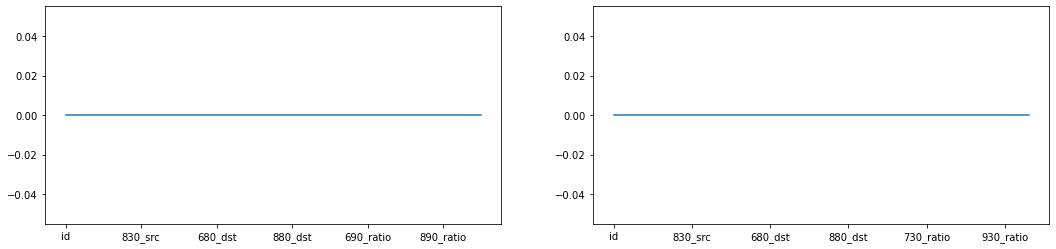

In [72]:
# 빈값이 채워 졌는지 최종적으로 확인해보자!
figure, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,4)

i = 10

train.isna().sum().plot(ax=ax1)
test.isna().sum().plot(ax=ax2)

<AxesSubplot:>

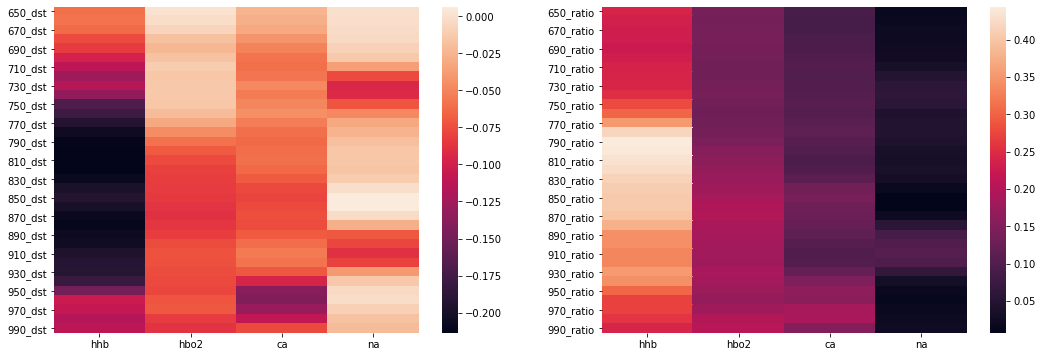

In [73]:
#새 컬럼이 제대로 된 것인지 히트맵으로 한번 상관관계를 가시적으로 보도록하자. 

figure, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,6)

sns.heatmap(train.corr().loc["650_dst":"990_dst","hhb":"na"], ax=ax1)
sns.heatmap(train.corr().loc["650_ratio":"990_ratio","hhb":"na"],ax=ax2)

In [218]:
#dst 히트맵 분석
# hhb컬럼은 어두운 것이 음의 상관성을 높게 가진다(-0.2이니 약 20%)/ 그외 나머지는 상관도가 낮다.

# ratio 히트맵 분석
# 일단은 dst보다 상관성이 높다.  hhb가 약 44%의 상관관계를 가진다. 
# na는 거의 0에 수렴하므로 상관성이 거의 없음을 알 수 있다. 

<AxesSubplot:>

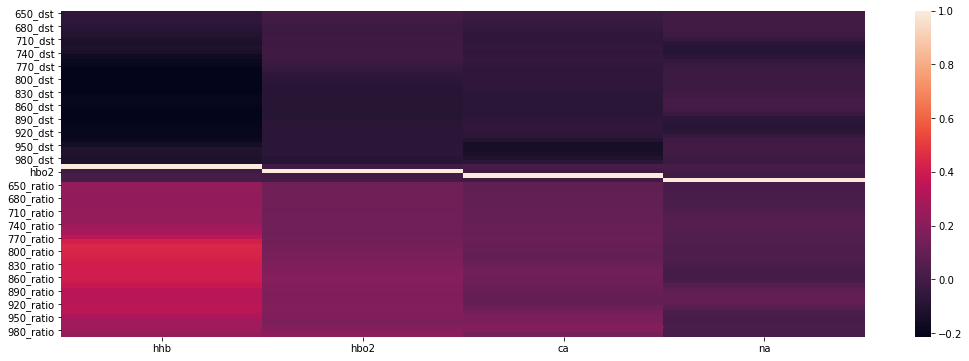

In [75]:
#하나로 합쳐서 보자. 
plt.figure(figsize=(18,6))
# corr-> 상관분석 / loc->상관분석 결과에서 범위설정. 
sns.heatmap(train.corr().loc["650_dst":"990_ratio","hhb":"na"])

In [76]:
#결과해석 -> ratio 컬럼일 떄 hhb와 상관관계가 유의미한 수치를 가진다. 
#ratio 컬럼만으로는 전체적 상관도 분석은 힘들다. 

In [219]:
# 변경된 빛 계산 식에 따라 새로운 식을 만들어 보자. 
# {[μ * DPF * d] + G} - {[μ * DPF * d] - G} / 지오메트리 변수를 제거해 준다면.. 가시성이 개선되지 않을까?

for i in range(35):
    train[f'{650 + (10 * i)}_ratio_diff'] = train[f'{650 + (10 * i)}_ratio'] - train['990_ratio']
    test[f'{650 + (10 * i)}_ratio_diff'] = test[f'{650 + (10 * i)}_ratio'] - test['990_ratio']

#상관도가 너무 높은 값을 제외해주고 전체 값이 상관도가 유의미한 값을 가지도록     
for i in range(35):
    train[f'{650 + (10 * i)}_ratio_diff2'] = train[f'{650 + (10 * i)}_ratio'] - (train['850_ratio']+train['860_ratio'])/2
    test[f'{650 + (10 * i)}_ratio_diff2'] = test[f'{650 + (10 * i)}_ratio'] - (test['850_ratio']+test['860_ratio'])/2  

<AxesSubplot:>

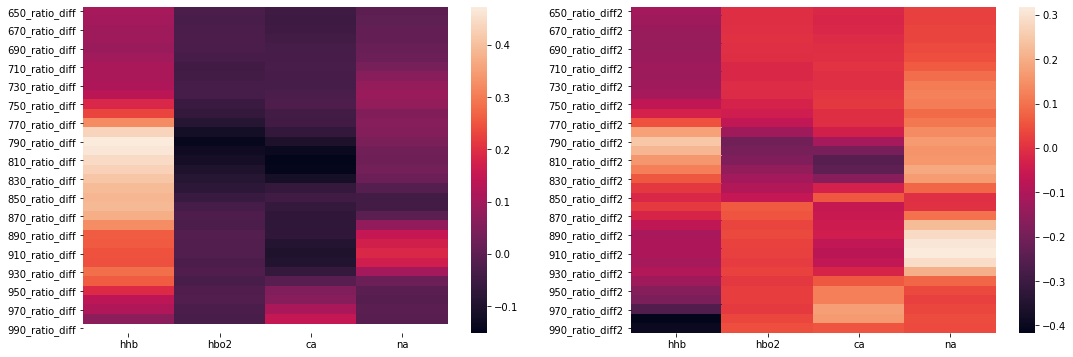

In [78]:
figure, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,6)

sns.heatmap(train.corr().loc["650_ratio_diff":"990_ratio_diff","hhb":"na"], ax=ax1)
sns.heatmap(train.corr().loc["650_ratio_diff2":"990_ratio_diff2","hhb":"na"],ax=ax2)

In [79]:
#빼기 
# 800~830 까지 범위 빼보기 
#for i in range(35):
#    train[f'{650 + (10 * i)}_ratio_diff2'] = train[f'{650 + (10 * i)}_ratio'] - (train['790_ratio']+train['800_ratio'])/2
#    test[f'{650 + (10 * i)}_ratio_diff2'] = test[f'{650 + (10 * i)}_ratio'] - (test['790_ratio']+test['800_ratio'])/2  

In [80]:
# lambert beer 법칙 추가 컬럼을 만들어 보기! 

In [220]:
train_dst = train.filter(regex='_dst$', axis='columns')
test_dst = test.filter(regex='_dst$', axis='columns')

In [221]:
train_dst.index #(id 값)

RangeIndex(start=0, stop=10000, step=1)

In [222]:
train_dst.loc[0]

650_dst    2.447758e-18
660_dst    1.894578e-18
670_dst    0.000000e+00
680_dst    6.412913e-18
690_dst    1.098559e-17
700_dst    8.907142e-19
710_dst    4.453571e-19
720_dst    0.000000e+00
730_dst    0.000000e+00
740_dst    0.000000e+00
750_dst    5.901745e-18
760_dst    3.539278e-18
770_dst    1.176812e-18
780_dst    2.837586e-17
790_dst    5.557492e-17
800_dst    1.046498e-16
810_dst    8.850865e-17
820_dst    7.236748e-17
830_dst    4.021610e-17
840_dst    2.397489e-17
850_dst    1.870153e-17
860_dst    1.808920e-17
870_dst    9.044602e-18
880_dst    0.000000e+00
890_dst    2.626216e-18
900_dst    3.076794e-18
910_dst    3.527371e-18
920_dst    2.086464e-18
930_dst    6.455564e-19
940_dst    3.227782e-19
950_dst    0.000000e+00
960_dst    5.337522e-19
970_dst    1.067504e-18
980_dst    5.998949e-18
990_dst    4.378513e-17
Name: 0, dtype: float64

In [223]:
# 평균 대비 dst 컬럼 값의 비율을 새로운 컬럼으로 만들어보자!.
# 위에서 했던 방식대로 하면 길어지니... 새로운 방법으로 해보자구! 

train_dst = train.filter(regex='_dst$', axis='columns')
test_dst = test.filter(regex='_dst$', axis='columns')

#tqdm을 써보자! / 0값은 빈값을 넣어주어 평균화에서 배제하게끔 만들어 준다. 실제 컬럼에는 영향을 주지 않는다. 
for i in tqdm(train_dst.index):
    train_dst.loc[i] = train_dst.loc[i] / train_dst.loc[i].replace(0, np.nan).mean()
   #test를 써야하는데 test는 10000부터 시작이니까... 따로 작성한다. 
for i in tqdm(test_dst.index):
    test_dst.loc[i] = test_dst.loc[i] / test_dst.loc[i].replace(0, np.nan).mean()
    
    
#업데이트 방식이아니라 새로운 컬럼을 만들어 주자. 
for i in range(35):
    train[f'{650 + 10*i}_dst_r'] = train_dst[f'{650 + 10*i}_dst']
    test[f'{650 + 10*i}_dst_r'] = test_dst[f'{650 + 10*i}_dst']

100%|██████████| 10000/10000 [00:06<00:00, 1657.20it/s]


In [85]:
#dst_r 끼리 뺴는 것을 하나 더 추가해보자. 

<AxesSubplot:>

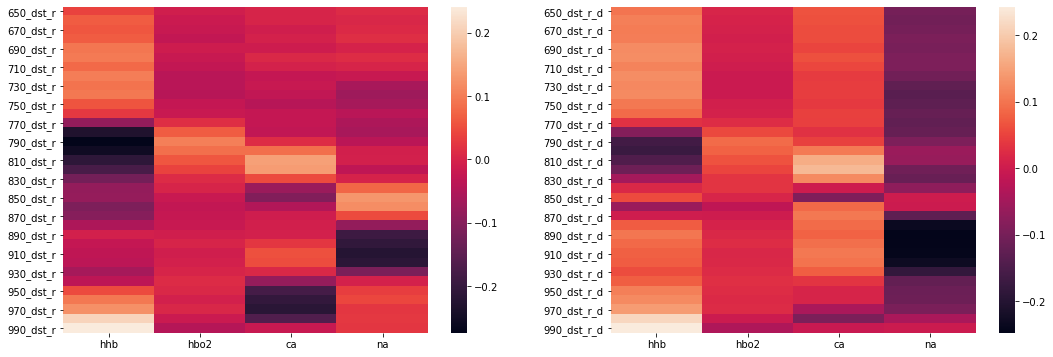

In [86]:
for i in range(35):
    train[f'{650 + (10 * i)}_dst_r_d'] = train[f'{650 + (10 * i)}_dst_r'] - (train['850_dst_r']+train['860_dst_r'])/2
    test[f'{650 + (10 * i)}_dst_r_d'] = test[f'{650 + (10 * i)}_dst_r'] - (test['850_dst_r']+test['860_dst_r'])/2 
    
#2개의 새로 만든 컬럼 비교해보자!  
figure, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,6)
sns.heatmap(train.corr().loc["650_dst_r":"990_dst_r","hhb":"na"], ax=ax1)
sns.heatmap(train.corr().loc["650_dst_r_d":"990_dst_r_d","hhb":"na"],ax=ax2)

In [87]:
#뺸 값이 더 상관관계 분석이 힘들다는 것을 볼 수 있다. 

In [8]:
train

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst,hhb,hbo2,ca,na
0,0,25,0.37950,0.42993,0.52076,0.57166,0.67818,0.75476,0.83580,0.93623,...,NaN,0.000000e+00,NaN,1.067504e-18,5.998949e-18,4.378513e-17,5.59,4.32,8.92,4.29
1,1,10,0.00000,0.00000,0.01813,0.00000,0.00000,0.01974,0.00321,0.00000,...,1.343132e-08,6.112685e-09,2.130547e-09,NaN,9.710091e-09,NaN,0.00,2.83,7.25,4.64
2,2,25,0.00000,0.03289,0.02416,0.03610,0.05843,0.09015,0.14944,0.18578,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.329725e-18,NaN,10.64,3.00,8.40,5.16
3,3,10,0.27503,0.31281,0.32898,0.41041,0.46587,0.52769,0.64369,0.73562,...,2.245998e-10,1.299511e-10,7.782625e-11,NaN,4.088921e-10,NaN,5.67,4.01,5.05,4.35
4,4,15,1.01521,1.00872,0.98930,0.98874,1.01773,1.01632,1.00009,0.98217,...,1.457955e-13,8.769053e-14,NaN,1.330237e-13,NaN,NaN,11.97,4.41,10.78,2.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,15,0.23929,0.30265,0.39929,0.51000,0.64072,0.77328,0.86722,0.95891,...,6.788642e-16,0.000000e+00,5.516467e-16,9.690979e-16,1.391635e-15,5.460702e-14,12.68,4.11,12.31,0.10
9996,9996,20,0.02583,0.00946,0.03650,0.01380,0.04093,0.04363,0.03260,0.05282,...,1.814274e-16,1.117148e-16,7.352416e-17,NaN,5.825347e-16,4.226436e-15,8.46,4.11,10.46,3.12
9997,9997,10,0.57589,0.62976,0.70571,0.77248,0.85402,0.92796,0.97691,0.98933,...,4.828451e-11,3.110419e-11,8.119095e-12,NaN,1.504115e-10,4.003657e-10,9.84,3.20,10.45,2.06
9998,9998,15,1.01477,1.01504,0.99125,0.98747,1.00717,1.01434,0.99529,1.01322,...,3.279271e-13,0.000000e+00,4.475946e-14,NaN,2.818857e-12,1.408742e-11,6.38,4.06,11.28,4.03


In [224]:
#hhb~na까지를 뺸 트레인을 새로 하나 생성. 
Xtrain = train.drop(['id','hhb','hbo2','ca','na'], axis='columns')
Xtest = test.drop(['id'], axis='columns')
Ytrain = train[['hhb','hbo2','ca','na']]

In [7]:
#LGBM 선형회귀 머신러닝 / 변수 설정 랜덤
base_model = LGBMRegressor(random_state=18)
#멀티모델 왜? 라벨이 2개이상이니 LGBM 혼자 처리를 못해준다. 
#고로 위에서 만든놈을 넣어서 멀티 모델을 만들어 준다. 
multi_model = MultiOutputRegressor(base_model)

In [226]:
multi_model

MultiOutputRegressor(estimator=LGBMRegressor(random_state=18))

In [227]:
Xtest.shape, Xtrain.shape

((10000, 211), (10000, 211))

In [92]:
#멀티 모델로 계산한 값을 누적 시킬곳을 만들어 줌.
y_pred = np.zeros((len(Xtest),4))
x_pred = np.zeros((len(Xtrain),4))
result = 0 
n_splits = 5 
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
for n_fold, (trn_idx, val_idx) in enumerate(kf.split(Xtrain)):
    trn_x, trn_y = Xtrain.iloc[trn_idx], Ytrain.iloc[trn_idx]
    val_x, val_y = Xtrain.iloc[val_idx], Ytrain.iloc[val_idx]
    
    #멀티모델 학습
    multi_model.fit(trn_x, trn_y)
    
    #for문 반복 마다 값이 누적 되도록.
    y_pred += multi_model.predict(Xtest) / n_splits
    
    x_pred += multi_model.predict(Xtrain) / n_splits
    
    val_pred = multi_model.predict(val_x)
    
    result += np.mean((np.abs(val_y - val_pred))) / n_splits
    
    print(result)

hhb     0.117963
hbo2    0.094413
ca      0.290451
na      0.212939
dtype: float64
hhb     0.246009
hbo2    0.190508
ca      0.576096
na      0.425170
dtype: float64
hhb     0.375242
hbo2    0.286622
ca      0.869860
na      0.637902
dtype: float64
hhb     0.504562
hbo2    0.382871
ca      1.157775
na      0.861348
dtype: float64
hhb     0.632758
hbo2    0.480736
ca      1.448604
na      1.075012
dtype: float64


In [93]:
#오차 결과값이 0에 수렴할 수록 머신러닝이 잘 된 결과. 
result.mean() 

0.9092775055241342

In [94]:
#과제 
#1. ratio / mean() , 빼기 ====> A/d
#2. ratio2 ,         빼기 ====> A
#3. ratio에서 추가로 뺴기 790 ~ 830 -> hbo2, ca, na의 가시성 개선.

In [95]:
#1 . 램버트 비어 법칙 추가 ratio 컬럼 새로 만들기 
train_ratio = train.filter(regex='_dst$', axis='columns')
test_ratio = test.filter(regex='_dst$', axis='columns')

In [96]:
train_ratio.index

RangeIndex(start=0, stop=10000, step=1)

In [97]:
train_ratio.loc[0]

650_dst    2.447758e-18
660_dst    1.894578e-18
670_dst    0.000000e+00
680_dst    6.412913e-18
690_dst    1.098559e-17
700_dst    8.907142e-19
710_dst    4.453571e-19
720_dst    0.000000e+00
730_dst    0.000000e+00
740_dst    0.000000e+00
750_dst    5.901745e-18
760_dst    3.539278e-18
770_dst    1.176812e-18
780_dst    2.837586e-17
790_dst    5.557492e-17
800_dst    1.046498e-16
810_dst    8.850865e-17
820_dst    7.236748e-17
830_dst    4.021610e-17
840_dst    2.397489e-17
850_dst    1.870153e-17
860_dst    1.808920e-17
870_dst    9.044602e-18
880_dst    0.000000e+00
890_dst    2.626216e-18
900_dst    3.076794e-18
910_dst    3.527371e-18
920_dst    2.086464e-18
930_dst    6.455564e-19
940_dst    3.227782e-19
950_dst    0.000000e+00
960_dst    5.337522e-19
970_dst    1.067504e-18
980_dst    5.998949e-18
990_dst    4.378513e-17
Name: 0, dtype: float64

# 1번 문제

In [98]:
# 평균 대비 ratio 컬럼 값의 비율을 새로운 컬럼으로 만들어보자!.
train_ratio = train.filter(regex='_ratio$', axis='columns')
test_ratio = test.filter(regex='_ratio$', axis='columns')

#tqdm을 써보자! / 0값은 빈값을 넣어주어 평균화에서 배제하게끔 만들어 준다. 실제 컬럼에는 영향을 주지 않는다. 
for i in tqdm(train_ratio.index):
    train_ratio.loc[i] = train_ratio.loc[i] / train_ratio.loc[i].replace(0, np.nan).mean()
    
#test를 써야하는데 test는 10000부터 시작이니까... 따로 작성한다. 
for i in tqdm(test_ratio.index):
    test_ratio.loc[i] = test_ratio.loc[i] / test_ratio.loc[i].replace(0, np.nan).mean()
    
#업데이트 방식이아니라 새로운 컬럼을 만들어 주자. 
for i in range(35):
    train[f'{650 + 10*i}_ratio_r'] = train_ratio[f'{650 + 10*i}_ratio']
    test[f'{650 + 10*i}_ratio_r'] = test_ratio[f'{650 + 10*i}_ratio']

100%|██████████| 10000/10000 [00:06<00:00, 1556.83it/s]


In [99]:
#1번 추가 빼기 

<AxesSubplot:>

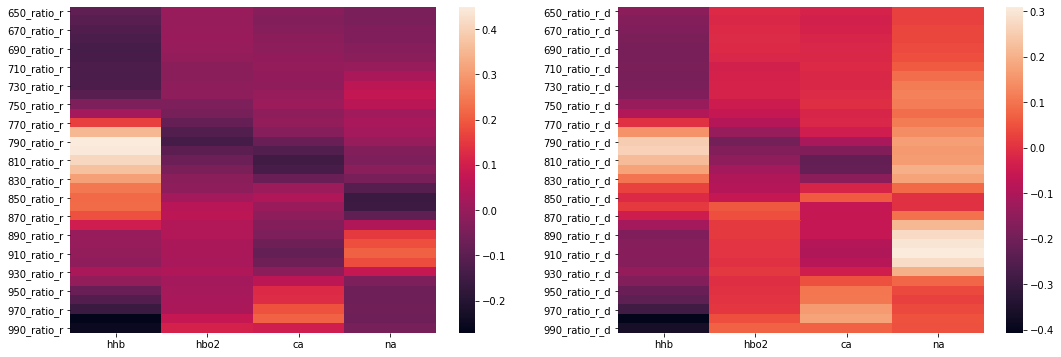

In [100]:
for i in range(35):
    train[f'{650 + (10 * i)}_ratio_r_d'] = train[f'{650 + (10 * i)}_ratio_r'] - (train['850_ratio_r']+train['860_ratio_r'])/2
    test[f'{650 + (10 * i)}_ratio_r_d'] = test[f'{650 + (10 * i)}_ratio_r'] - (test['850_ratio_r']+test['860_ratio_r'])/2 
    
#2개의 새로 만든 컬럼 비교해보자!  
figure, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,6)
sns.heatmap(train.corr().loc["650_ratio_r":"990_ratio_r","hhb":"na"], ax=ax1)
sns.heatmap(train.corr().loc["650_ratio_r_d":"990_ratio_r_d","hhb":"na"],ax=ax2)

# 2번 문제

In [101]:
for i in range(35):
    train[f'{650+(i*10)}_ratio2'] = np.log(train[f'{650+(i*10)}_src']/train[f'{650+(i*10)}_dst'])
    test[f'{650+(i*10)}_ratio2'] = np.log(test[f'{650+(i*10)}_src']/test[f'{650+(i*10)}_dst'])

<AxesSubplot:>

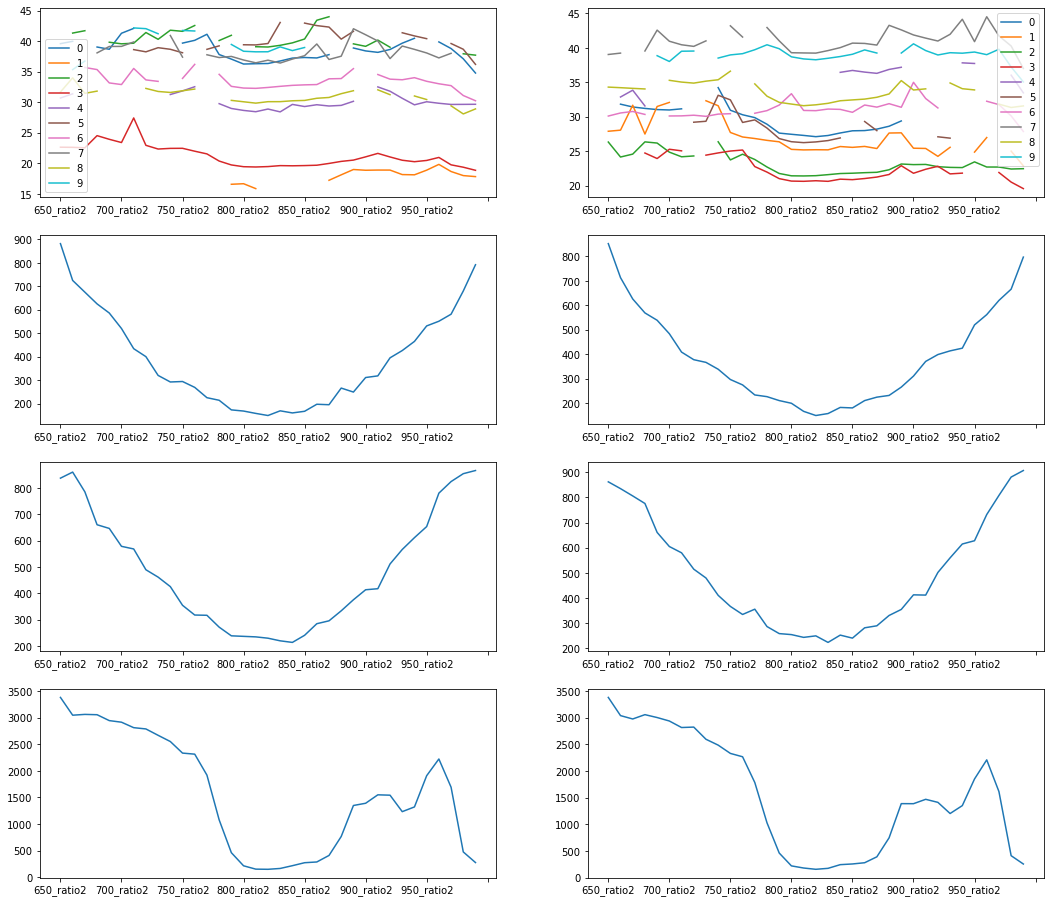

In [102]:
figure, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)

i = 10

#전체 그래프를 그려라
train.filter(regex='ratio2$', axis='columns').head(i).T.plot(ax=ax1)
test.filter(regex='ratio2$', axis='columns').head(i).T.plot(ax=ax2)
#빈값만 찾아서 그려라
train.filter(regex='ratio2$', axis='columns').isna().sum().plot(ax=ax3)
test.filter(regex='ratio2$', axis='columns').isna().sum().plot(ax=ax4)
#-inf 값을 찾은 후 그려라 
train.filter(regex='ratio2$', axis='columns').isin([float('-inf')]).sum().plot(ax=ax5)
test.filter(regex='ratio2$', axis='columns').isin([float('-inf')]).sum().plot(ax=ax6)
#inf 값을 찾은 후 그려라 
train.filter(regex='ratio2$', axis='columns').isin([float('inf')]).sum().plot(ax=ax7)
test.filter(regex='ratio2$', axis='columns').isin([float('inf')]).sum().plot(ax=ax8)

In [103]:
#- + inf 값을 빈값으로 변환 시켜보자
train_r2 = train.filter(regex='_ratio2$',axis='columns').replace(float('-inf'),np.nan).replace(float('inf'),np.nan)
test_r2 = test.filter(regex='_ratio2$',axis='columns').replace(float('-inf'),np.nan).replace(float('inf'),np.nan)
#보간 하기 전 컬럼 명을 숫자로 바꾸어 주자
train_r2.columns = list(650 + 10*np.arange(35))
test_r2.columns = list(650 + 10*np.arange(35))
#컬럼을 보간
train_ratio2 = train_r2.interpolate(method='linear',axis=1)
test_ratio2 = test_r2.interpolate(method='linear',axis=1)
#컬럼명을 다시 원래대로 변경 해서 ratio로 변환.
train_ratio2.columns = train.filter(regex='_ratio2$', axis='columns').columns
test_ratio2.columns = test.filter(regex='_ratio2$', axis='columns').columns

In [104]:
#ratio2로 새로 만들어 졌는지 확인해보자 . 
print(train_ratio2.columns)
print(test_ratio2.columns)

Index(['650_ratio2', '660_ratio2', '670_ratio2', '680_ratio2', '690_ratio2',
       '700_ratio2', '710_ratio2', '720_ratio2', '730_ratio2', '740_ratio2',
       '750_ratio2', '760_ratio2', '770_ratio2', '780_ratio2', '790_ratio2',
       '800_ratio2', '810_ratio2', '820_ratio2', '830_ratio2', '840_ratio2',
       '850_ratio2', '860_ratio2', '870_ratio2', '880_ratio2', '890_ratio2',
       '900_ratio2', '910_ratio2', '920_ratio2', '930_ratio2', '940_ratio2',
       '950_ratio2', '960_ratio2', '970_ratio2', '980_ratio2', '990_ratio2'],
      dtype='object')
Index(['650_ratio2', '660_ratio2', '670_ratio2', '680_ratio2', '690_ratio2',
       '700_ratio2', '710_ratio2', '720_ratio2', '730_ratio2', '740_ratio2',
       '750_ratio2', '760_ratio2', '770_ratio2', '780_ratio2', '790_ratio2',
       '800_ratio2', '810_ratio2', '820_ratio2', '830_ratio2', '840_ratio2',
       '850_ratio2', '860_ratio2', '870_ratio2', '880_ratio2', '890_ratio2',
       '900_ratio2', '910_ratio2', '920_ratio2', '930

In [105]:
# 빈값을 앞 컬럼에서 가져와 채우는 단계
for i in range(34):  
    train_ratio2.loc[train_ratio2[f'{980-(i*10)}_ratio2'].isna(),
                    f'{980-(i*10)}_ratio2'] = train_ratio2.loc[train_ratio2[f'{980-(i*10)}_ratio2'].isna(),
                                                           f'{990-(i*10)}_ratio2']
    test_ratio2.loc[test_ratio2[f'{980-(i*10)}_ratio2'].isna(),
                   f'{980-(i*10)}_ratio2'] = test_ratio2.loc[test_ratio2[f'{980-(i*10)}_ratio2'].isna(),
                                                         f'{990-(i*10)}_ratio2']

<AxesSubplot:>

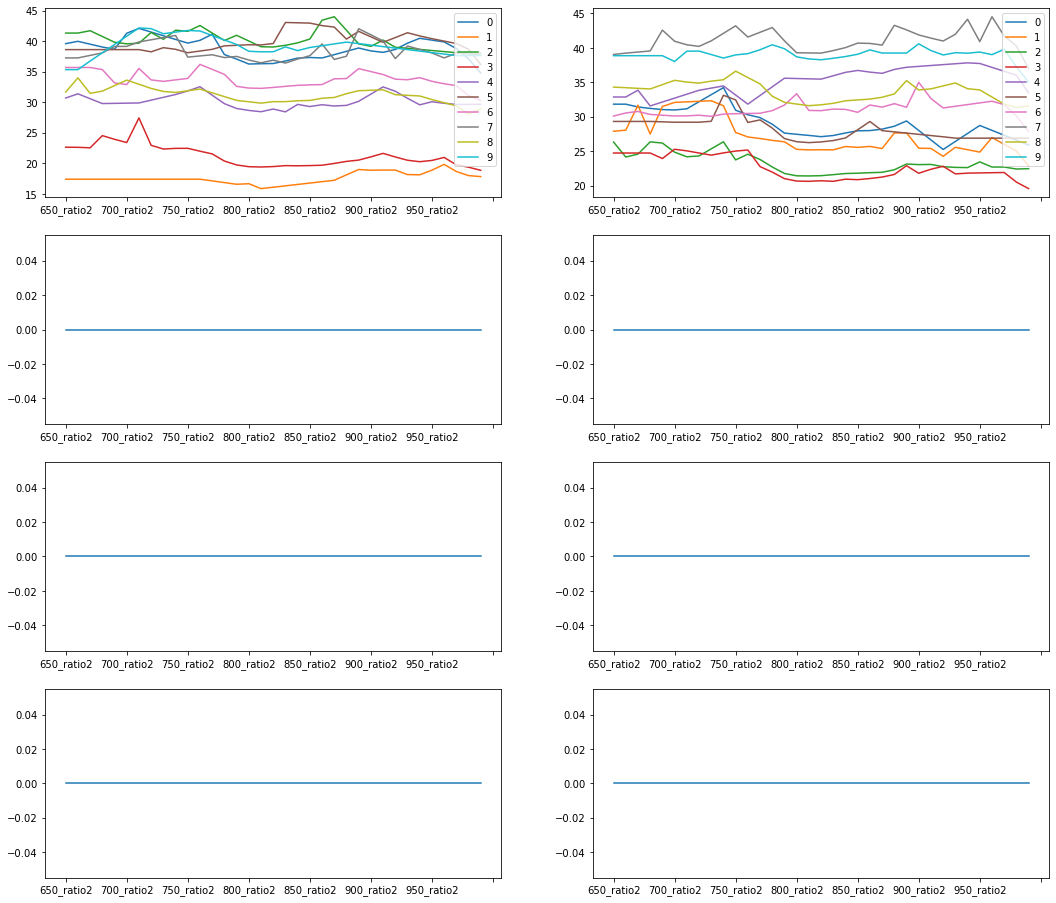

In [106]:
# 빈값이 채워 졌는지 확인해보자!
figure, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)

i = 10

train_ratio2.head(i).T.plot(ax=ax1)
test_ratio2.head(i).T.plot(ax=ax2)
train_ratio2.isna().sum().plot(ax=ax3)
test_ratio2.isna().sum().plot(ax=ax4)
train_ratio2.isin([float('-inf')]).sum().plot(ax=ax5)
test_ratio2.isin([float('-inf')]).sum().plot(ax=ax6)
train_ratio2.isin([float('inf')]).sum().plot(ax=ax7)
test_ratio2.isin([float('inf')]).sum().plot(ax=ax8)

In [107]:
# 잘 채워졌군!

<AxesSubplot:>

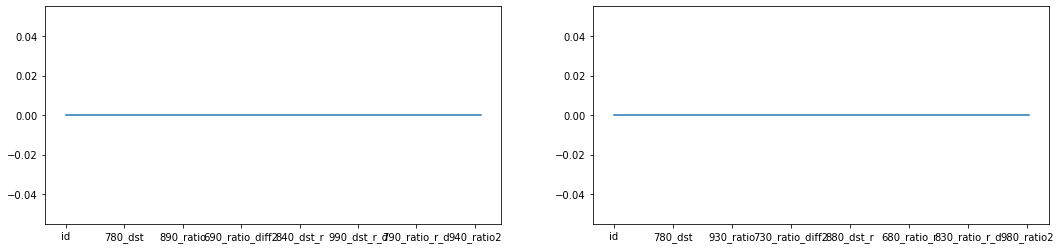

In [108]:
#잘 변경된것을 확인하였다면 원본파일을 업데이트 하여주자. 
train.update(train_ratio2)
test.update(test_ratio2)

# 빈값이 채워 졌는지 최종적으로 확인해보자!
figure, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,4)
i = 10
train.isna().sum().plot(ax=ax1)
test.isna().sum().plot(ax=ax2)

<AxesSubplot:>

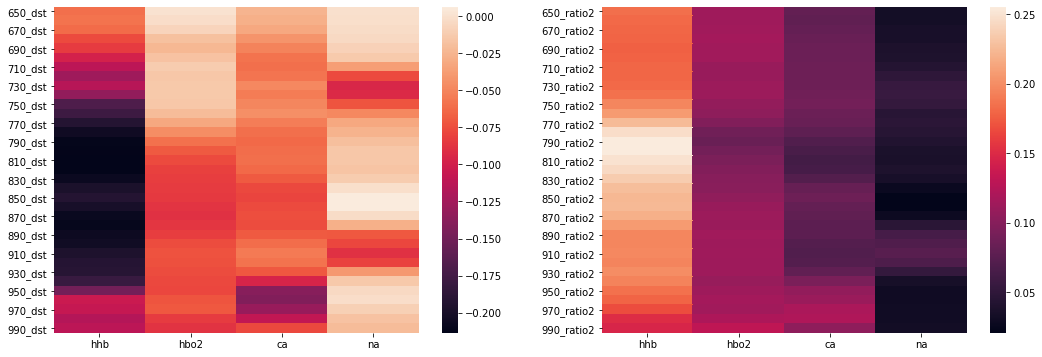

In [109]:
#새 컬럼이 제대로 된 것인지 히트맵으로 한번 상관관계를 가시적으로 보도록하자. 
figure, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,6)
sns.heatmap(train.corr().loc["650_dst":"990_dst","hhb":"na"], ax=ax1)
sns.heatmap(train.corr().loc["650_ratio2":"990_ratio2","hhb":"na"],ax=ax2)

In [110]:
#ratio 2는 ratio 보다 정확도는 떨어지지만 컬럼을 추가할 경우 머신러닝에는 도움이 된다. 

# 3번 문제 
 # ratio에서 추가로 뺴기 790 ~ 830 -> hbo2, ca, na의 가시성 개선.

In [111]:
# 변경된 빛 계산 식에 따라 새로운 식을 만들어 보자. 
# {[μ * DPF * d] + G} - {[μ * DPF * d] - G}
for i in range(35):
    train[f'{650 + (10 * i)}_ratio_diff3'] = train[f'{650 + (10 * i)}_ratio'] - (train['790_ratio']+train['800_ratio'])/2
    test[f'{650 + (10 * i)}_ratio_diff3'] = test[f'{650 + (10 * i)}_ratio'] - (test['790_ratio']+test['800_ratio'])/2  
for i in range(35):
    train[f'{650 + (10 * i)}_ratio_diff4'] = train[f'{650 + (10 * i)}_ratio'] - (train['800_ratio']+train['810_ratio'])/2
    test[f'{650 + (10 * i)}_ratio_diff4'] = test[f'{650 + (10 * i)}_ratio'] - (test['800_ratio']+test['810_ratio'])/2  
for i in range(35):
    train[f'{650 + (10 * i)}_ratio_diff5'] = train[f'{650 + (10 * i)}_ratio'] - (train['810_ratio']+train['820_ratio'])/2
    test[f'{650 + (10 * i)}_ratio_diff5'] = test[f'{650 + (10 * i)}_ratio'] - (test['810_ratio']+test['820_ratio'])/2  
for i in range(35):
    train[f'{650 + (10 * i)}_ratio_diff6'] = train[f'{650 + (10 * i)}_ratio'] - (train['820_ratio']+train['830_ratio'])/2
    test[f'{650 + (10 * i)}_ratio_diff6'] = test[f'{650 + (10 * i)}_ratio'] - (test['820_ratio']+test['830_ratio'])/2      

<AxesSubplot:>

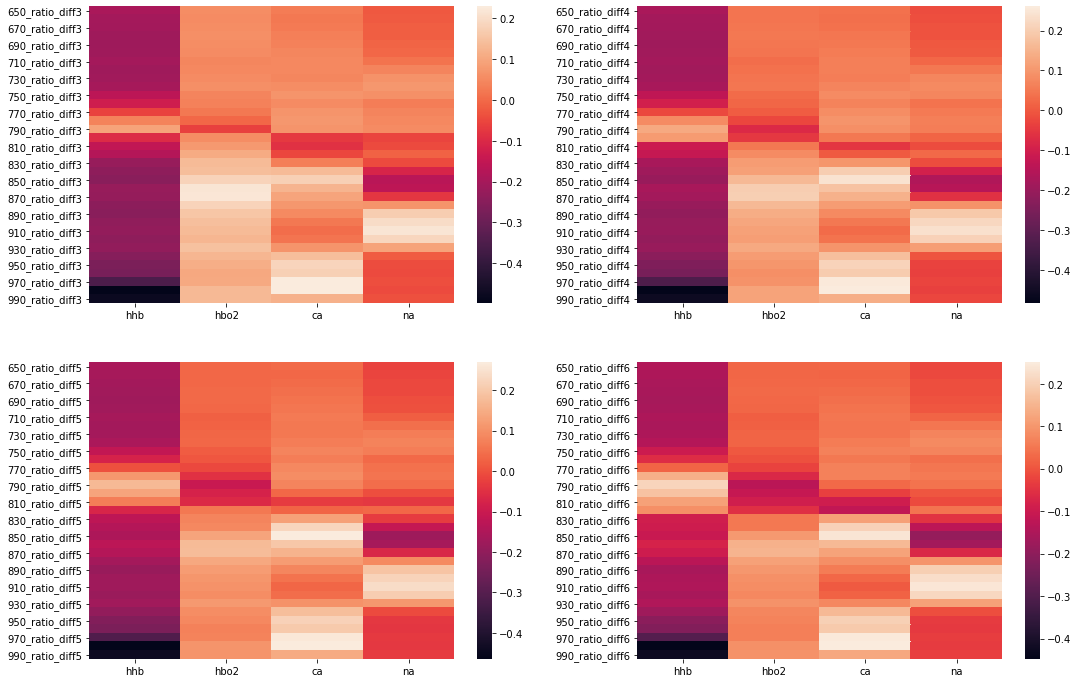

In [113]:
#새컬럼의 상관도 분석해보기 
figure, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,12)

sns.heatmap(train.corr().loc["650_ratio_diff3":"990_ratio_diff3","hhb":"na"], ax=ax1)
sns.heatmap(train.corr().loc["650_ratio_diff4":"990_ratio_diff4","hhb":"na"],ax=ax2)
sns.heatmap(train.corr().loc["650_ratio_diff5":"990_ratio_diff5","hhb":"na"], ax=ax3)
sns.heatmap(train.corr().loc["650_ratio_diff6":"990_ratio_diff6","hhb":"na"],ax=ax4)

In [114]:
#ca가 개선되고 hhb가 -40%의 높은 상관도가 나왔다!.

In [115]:
#컬럼 정리 및 업데이트 
Xtrain = train.drop(['id','hhb','hbo2','ca','na'], axis='columns')
Xtest = test.drop(['id'], axis='columns')
Ytrain = train[['hhb','hbo2','ca','na']]

In [116]:
#LGBM 선형회귀 머신러닝 / 변수 설정 랜덤
base_model = LGBMRegressor(random_state=18)
#멀티모델 왜? 라벨이 2개이상이니 LGBM 혼자 처리를 못해준다. 
#고로 위에서 만든놈을 넣어서 멀티 모델을 만들어 준다. 
multi_model = MultiOutputRegressor(base_model)

In [117]:
multi_model

MultiOutputRegressor(estimator=LGBMRegressor(random_state=18))

In [118]:
Xtest.shape, Xtrain.shape

((10000, 491), (10000, 491))

In [119]:
#멀티 모델로 계산한 값을 누적 시킬곳을 만들어 줌.
y_pred = np.zeros((len(Xtest),4))
x_pred = np.zeros((len(Xtrain),4))
result = 0 
n_splits = 5 
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
for n_fold, (trn_idx, val_idx) in enumerate(kf.split(Xtrain)):
    trn_x, trn_y = Xtrain.iloc[trn_idx], Ytrain.iloc[trn_idx]
    val_x, val_y = Xtrain.iloc[val_idx], Ytrain.iloc[val_idx]
    
    #멀티모델 학습
    multi_model.fit(trn_x, trn_y)
    
    #for문 반복 마다 값이 누적 되도록.
    y_pred += multi_model.predict(Xtest) / n_splits
    
    x_pred += multi_model.predict(Xtrain) / n_splits
    
    val_pred = multi_model.predict(val_x)
    
    result += np.mean((np.abs(val_y - val_pred))) / n_splits
    
    print(result)

hhb     0.118526
hbo2    0.089855
ca      0.287473
na      0.211680
dtype: float64
hhb     0.241146
hbo2    0.181103
ca      0.569388
na      0.422426
dtype: float64
hhb     0.361795
hbo2    0.272784
ca      0.857494
na      0.633631
dtype: float64
hhb     0.490593
hbo2    0.364772
ca      1.139640
na      0.854829
dtype: float64
hhb     0.613474
hbo2    0.456750
ca      1.420448
na      1.067295
dtype: float64


In [120]:
#오차 결과값이 0에 수렴할 수록 머신러닝이 잘 된 결과. 
result.mean() 

0.8894917521230781

In [121]:
# 추가수행 

for i in range(35):
    train[f'{650 + (10 * i)}_ratio_diff7'] = train[f'{650 + (10 * i)}_ratio'] - (train['790_ratio']+train['800_ratio'])/2
    test[f'{650 + (10 * i)}_ratio_diff7'] = test[f'{650 + (10 * i)}_ratio'] - (test['790_ratio']+test['800_ratio'])/2  
for i in range(35):
    train[f'{650 + (10 * i)}_ratio_diff8'] = train[f'{650 + (10 * i)}_ratio'] - (train['800_ratio']+train['810_ratio'])/2
    test[f'{650 + (10 * i)}_ratio_diff8'] = test[f'{650 + (10 * i)}_ratio'] - (test['800_ratio']+test['810_ratio'])/2  
for i in range(35):
    train[f'{650 + (10 * i)}_ratio_diff9'] = train[f'{650 + (10 * i)}_ratio'] - (train['810_ratio']+train['820_ratio'])/2
    test[f'{650 + (10 * i)}_ratio_diff9'] = test[f'{650 + (10 * i)}_ratio'] - (test['810_ratio']+test['820_ratio'])/2  
for i in range(35):
    train[f'{650 + (10 * i)}_ratio_diff10'] = train[f'{650 + (10 * i)}_ratio'] - (train['820_ratio']+train['830_ratio'])/2
    test[f'{650 + (10 * i)}_ratio_diff10'] = test[f'{650 + (10 * i)}_ratio'] - (test['820_ratio']+test['830_ratio'])/2   
for i in range(35):
    train[f'{650 + (10 * i)}_ratio_diff11'] = train[f'{650 + (10 * i)}_ratio'] - (train['830_ratio']+train['840_ratio'])/2
    test[f'{650 + (10 * i)}_ratio_diff11'] = test[f'{650 + (10 * i)}_ratio'] - (test['830_ratio']+test['840_ratio'])/2 
for i in range(35):
    train[f'{650 + (10 * i)}_ratio_diff12'] = train[f'{650 + (10 * i)}_ratio'] - (train['840_ratio']+train['850_ratio'])/2
    test[f'{650 + (10 * i)}_ratio_diff12'] = test[f'{650 + (10 * i)}_ratio'] - (test['840_ratio']+test['850_ratio'])/2 
for i in range(35):
    train[f'{650 + (10 * i)}_ratio_diff13'] = train[f'{650 + (10 * i)}_ratio'] - (train['850_ratio']+train['860_ratio'])/2
    test[f'{650 + (10 * i)}_ratio_diff13'] = test[f'{650 + (10 * i)}_ratio'] - (test['850_ratio']+test['860_ratio'])/2 
for i in range(35):
    train[f'{650 + (10 * i)}_ratio_diff14'] = train[f'{650 + (10 * i)}_ratio'] - (train['860_ratio']+train['870_ratio'])/2
    test[f'{650 + (10 * i)}_ratio_diff14'] = test[f'{650 + (10 * i)}_ratio'] - (test['860_ratio']+test['870_ratio'])/2 

In [123]:
#컬럼 정리 
Xtrain = train.drop(['id','hhb','hbo2','ca','na'], axis='columns')
Xtest = test.drop(['id'], axis='columns')
Ytrain = train[['hhb','hbo2','ca','na']]

In [124]:
#컬럼 정리 
Xtrain = train.drop(['id','hhb','hbo2','ca','na'], axis='columns')
Xtest = test.drop(['id'], axis='columns')
Ytrain = train[['hhb','hbo2','ca','na']]
#LGBM 선형회귀 머신러닝 / 변수 설정 랜덤
base_model = LGBMRegressor(random_state=18)
#멀티모델 왜? 라벨이 2개이상이니 LGBM 혼자 처리를 못해준다. 
#고로 위에서 만든놈을 넣어서 멀티 모델을 만들어 준다. 
multi_model = MultiOutputRegressor(base_model)

In [125]:
#LGBM 선형회귀 머신러닝 / 변수 설정 랜덤
base_model = LGBMRegressor(random_state=18)
#멀티모델 왜? 라벨이 2개이상이니 LGBM 혼자 처리를 못해준다. 
#고로 위에서 만든놈을 넣어서 멀티 모델을 만들어 준다. 
multi_model = MultiOutputRegressor(base_model)

In [126]:
multi_model

MultiOutputRegressor(estimator=LGBMRegressor(random_state=18))

In [127]:
Xtest.shape, Xtrain.shape

((10000, 771), (10000, 771))

In [177]:
#멀티 모델로 계산한 값을 누적 시킬곳을 만들어 줌.
y_pred = np.zeros((len(Xtest),4))
x_pred = np.zeros((len(Xtrain),4))
result = 0 
n_splits = 5 
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
for n_fold, (trn_idx, val_idx) in enumerate(kf.split(Xtrain)):
    trn_x, trn_y = Xtrain.iloc[trn_idx], Ytrain.iloc[trn_idx]
    val_x, val_y = Xtrain.iloc[val_idx], Ytrain.iloc[val_idx]
    
    #멀티모델 학습
    multi_model.fit(trn_x, trn_y)
    
    #for문 반복 마다 값이 누적 되도록.
    y_pred += multi_model.predict(Xtest) / n_splits
    
    x_pred += multi_model.predict(Xtrain) / n_splits
    
    val_pred = multi_model.predict(val_x)
    
    result += np.mean((np.abs(val_y - val_pred))) / n_splits
    
    print(result)

hhb     0.063113
hbo2    0.046312
ca      0.150851
na      0.100324
dtype: float64


KeyboardInterrupt: 

In [129]:
#최종제출값
result.mean() 

0.7103131513349167

In [130]:
#과제물 제출

In [131]:
y_pred

array([[ 6.70243406,  3.90302778,  7.69122397,  2.12448464],
       [ 7.23512542,  2.00852303,  6.63726865,  2.50074358],
       [ 7.19445832,  4.03477933,  8.65325244,  2.83553947],
       ...,
       [ 5.82869652,  3.16574389,  7.37599357,  2.71608632],
       [10.53603295,  3.56568211,  7.0992921 ,  3.26975479],
       [ 2.87720809,  4.29973059,  8.70305619,  2.31498913]])

In [132]:
#요 안에 결과 값 집어 넣기. 
sub = pd.read_csv('sample_submission.csv', index_col='id')
sub

,hhb,hbo2,ca,na
id,,,,
10000,0,0,0,0
10001,0,0,0,0
10002,0,0,0,0
10003,0,0,0,0
10004,0,0,0,0
...,...,...,...,...
19995,0,0,0,0
19996,0,0,0,0
19997,0,0,0,0


In [133]:
#최종 제출 결과물.
sub['hhb'] = y_pred[:, 0]
sub['hbo2'] = y_pred[:, 1]
sub['ca'] = y_pred[:, 2]
sub['na'] = y_pred[:, 3]
sub

,hhb,hbo2,ca,na
id,,,,
10000,6.702434,3.903028,7.691224,2.124485
10001,7.235125,2.008523,6.637269,2.500744
10002,7.194458,4.034779,8.653252,2.835539
10003,6.736888,3.237782,7.322125,3.381923
10004,5.105855,2.639752,6.914916,2.288553
...,...,...,...,...
19995,3.344834,3.532482,9.165519,4.173893
19996,8.611809,2.185201,6.877971,2.738660
19997,5.828697,3.165744,7.375994,2.716086


In [134]:
y_pred

array([[ 6.70243406,  3.90302778,  7.69122397,  2.12448464],
       [ 7.23512542,  2.00852303,  6.63726865,  2.50074358],
       [ 7.19445832,  4.03477933,  8.65325244,  2.83553947],
       ...,
       [ 5.82869652,  3.16574389,  7.37599357,  2.71608632],
       [10.53603295,  3.56568211,  7.0992921 ,  3.26975479],
       [ 2.87720809,  4.29973059,  8.70305619,  2.31498913]])

In [135]:
#이렇게 저장된 파일을 데이콘에 제출!
sub.to_csv('20210824_KimTaeWoong2.csv')

In [136]:
#좀 더 정확도를 높이려면 어떻게 해야하는가?
#기존 컬럼과 상관없는 새로운 방식의 컬럼을 추가한다면?  정확도가 많이 개선될 수 있다.
#그 이전까지는 점진적으로 개선된다. 

# 롤링 작업을 추가로 실습해 보도록 하자 ! 0825

In [137]:
train_o = pd.read_csv('train.csv')
test_o = pd.read_csv('test.csv')

#둘다 사용가능 
#1. 
#src_col = train_o.filter(regex='_src$', axis='columns')
#2.
src_col = train_o.columns[train_o.columns.str.contains('src')]
dst_col = train_o.columns[train_o.columns.str.contains('dst')]

print(src_col)
print(dst_col)

Index(['650_src', '660_src', '670_src', '680_src', '690_src', '700_src',
       '710_src', '720_src', '730_src', '740_src', '750_src', '760_src',
       '770_src', '780_src', '790_src', '800_src', '810_src', '820_src',
       '830_src', '840_src', '850_src', '860_src', '870_src', '880_src',
       '890_src', '900_src', '910_src', '920_src', '930_src', '940_src',
       '950_src', '960_src', '970_src', '980_src', '990_src'],
      dtype='object')
Index(['650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
       '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
       '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
       '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
       '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
       '950_dst', '960_dst', '970_dst', '980_dst', '990_dst'],
      dtype='object')


In [138]:
#롤링 작업을 위한 새로운 함수를 만들어 보자!
def rolling_f(x):
    #650~1000범위까지 10간격으로 
    #legnth = [w for w in range(650, 1000, 10)]
    #평탄화 간격 지정
    for k in [3,5]:
        #범위=window / min_periods가 1일 경우 데이터가 하나만 있어도 평균화./axis=1 컬럼단위 
        #src는 빈값이 없으므로 큰 의미 없으나, 램버트 비어법칙 사용을 위해. 
        length1 = x[src_col].rolling(window = k, min_periods = 1, axis = 1).mean()
        length2 = x[dst_col].rolling(window = k, min_periods = 1, axis = 1).mean()
        
        #for i in length로 써도된다. 
        for i in list(650 + np.arange(35)*10):
            #롤링한 값을 램버트 비어 법칙에 대입해보자.
            #f'{i *10 + 650}_src'요거 대신에 아래 것을 사용해보자. 
            # i_rolling_k 가 됨. ex) 650_rolling_5 / 뒤의 것은 ex)650_src가 됨. 
            x['%s_rolling_%s'%(i,k)] = np.log(length1['%s_src'%i]/length2['%s_dst'%i]) / (0.1*x['rho'])
        return x  #애는 보기쉬우라고 트레인 넣어놓은거임
    
train_rf = rolling_f(train_o)
test_rf = rolling_f(test_o)

In [139]:
def rolling_f2(train, train_rf):
    for k in [3,5]:
        for i in list(650 + np.arange(35)*10):
            train['%s_rolling_%s'%(i,k)] = train_rf['%s_rolling_%s'%(i,k)]
        return train
    
train = rolling_f2(train, train_rf)
test = rolling_f2(test, test_rf)

In [140]:
#위에 쓴 친구들은 아래와 같음
#위의 2개 실행하는 것과 이거 하나 실행하는게 동일함. 
for k in [3,5]:
    #train 롤링
    length1 = train[src_col].rolling(window = k, min_periods = 1, axis = 1).mean()
    length2 = train[dst_col].rolling(window = k, min_periods = 1, axis = 1).mean()
    #rtest 롤링
    length3 = test[src_col].rolling(window = k, min_periods = 1, axis = 1).mean()
    length4 = test[dst_col].rolling(window = k, min_periods = 1, axis = 1).mean()
    
    # 램버트 함수 적용 
    for i in range(35):
        train[f'{650 + 10*i}_rolling_{k}'] = np.log(length1[f'{650 + 10*i}_src']/length2[f'{650 + 10*i}_dst']) / (0.1 * train['rho'])
        test[f'{650 + 10*i}_rolling_{k}'] = np.log(length3[f'{650 + 10*i}_src']/length4[f'{650 + 10*i}_dst']) / (0.1 * test['rho']) 

In [141]:
#마지막항 괄호 조심할 것. 
#k 값을 강화 시킬 수록 그래프가 평탄화 됨. 

In [142]:
train.filter(regex='_rolling_5$', axis='columns').columns

Index(['650_rolling_5', '660_rolling_5', '670_rolling_5', '680_rolling_5',
       '690_rolling_5', '700_rolling_5', '710_rolling_5', '720_rolling_5',
       '730_rolling_5', '740_rolling_5', '750_rolling_5', '760_rolling_5',
       '770_rolling_5', '780_rolling_5', '790_rolling_5', '800_rolling_5',
       '810_rolling_5', '820_rolling_5', '830_rolling_5', '840_rolling_5',
       '850_rolling_5', '860_rolling_5', '870_rolling_5', '880_rolling_5',
       '890_rolling_5', '900_rolling_5', '910_rolling_5', '920_rolling_5',
       '930_rolling_5', '940_rolling_5', '950_rolling_5', '960_rolling_5',
       '970_rolling_5', '980_rolling_5', '990_rolling_5'],
      dtype='object')

In [143]:
train.filter(regex='_rolling_3$', axis='columns').columns

Index(['650_rolling_3', '660_rolling_3', '670_rolling_3', '680_rolling_3',
       '690_rolling_3', '700_rolling_3', '710_rolling_3', '720_rolling_3',
       '730_rolling_3', '740_rolling_3', '750_rolling_3', '760_rolling_3',
       '770_rolling_3', '780_rolling_3', '790_rolling_3', '800_rolling_3',
       '810_rolling_3', '820_rolling_3', '830_rolling_3', '840_rolling_3',
       '850_rolling_3', '860_rolling_3', '870_rolling_3', '880_rolling_3',
       '890_rolling_3', '900_rolling_3', '910_rolling_3', '920_rolling_3',
       '930_rolling_3', '940_rolling_3', '950_rolling_3', '960_rolling_3',
       '970_rolling_3', '980_rolling_3', '990_rolling_3'],
      dtype='object')

<AxesSubplot:>

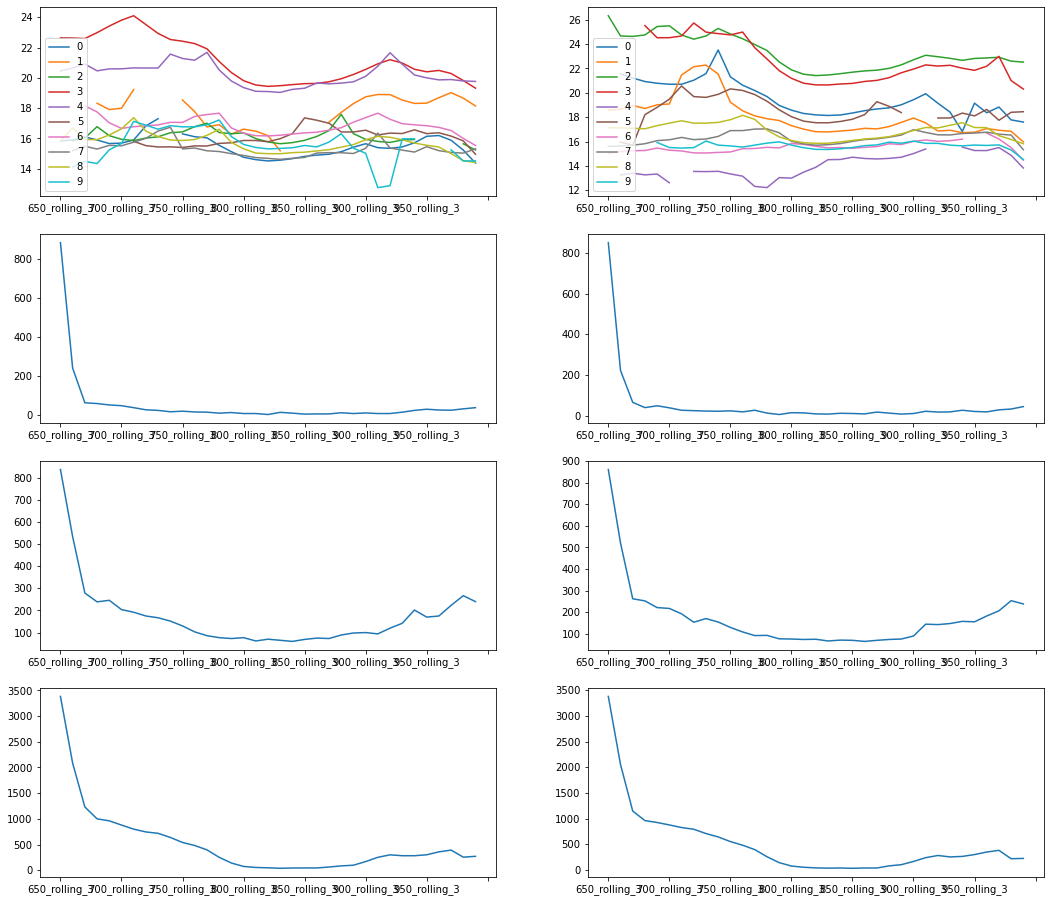

In [144]:
#롤링한 값을 다시 확인해 보자! 
figure, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)
i = 10

#전체 그래프를 그려라
train.filter(regex='_rolling_3$', axis='columns').head(i).T.plot(ax=ax1)
test.filter(regex='_rolling_3$', axis='columns').head(i).T.plot(ax=ax2)
#빈값만 찾아서 그려라
train.filter(regex='_rolling_3$', axis='columns').isna().sum().plot(ax=ax3)
test.filter(regex='_rolling_3$', axis='columns').isna().sum().plot(ax=ax4)
#-inf 값을 찾은 후 그려라 
train.filter(regex='_rolling_3$', axis='columns').isin([float('-inf')]).sum().plot(ax=ax5)
test.filter(regex='_rolling_3$', axis='columns').isin([float('-inf')]).sum().plot(ax=ax6)
#inf 값을 찾은 후 그려라 
train.filter(regex='_rolling_3$', axis='columns').isin([float('inf')]).sum().plot(ax=ax7)
test.filter(regex='_rolling_3$', axis='columns').isin([float('inf')]).sum().plot(ax=ax8)

<AxesSubplot:>

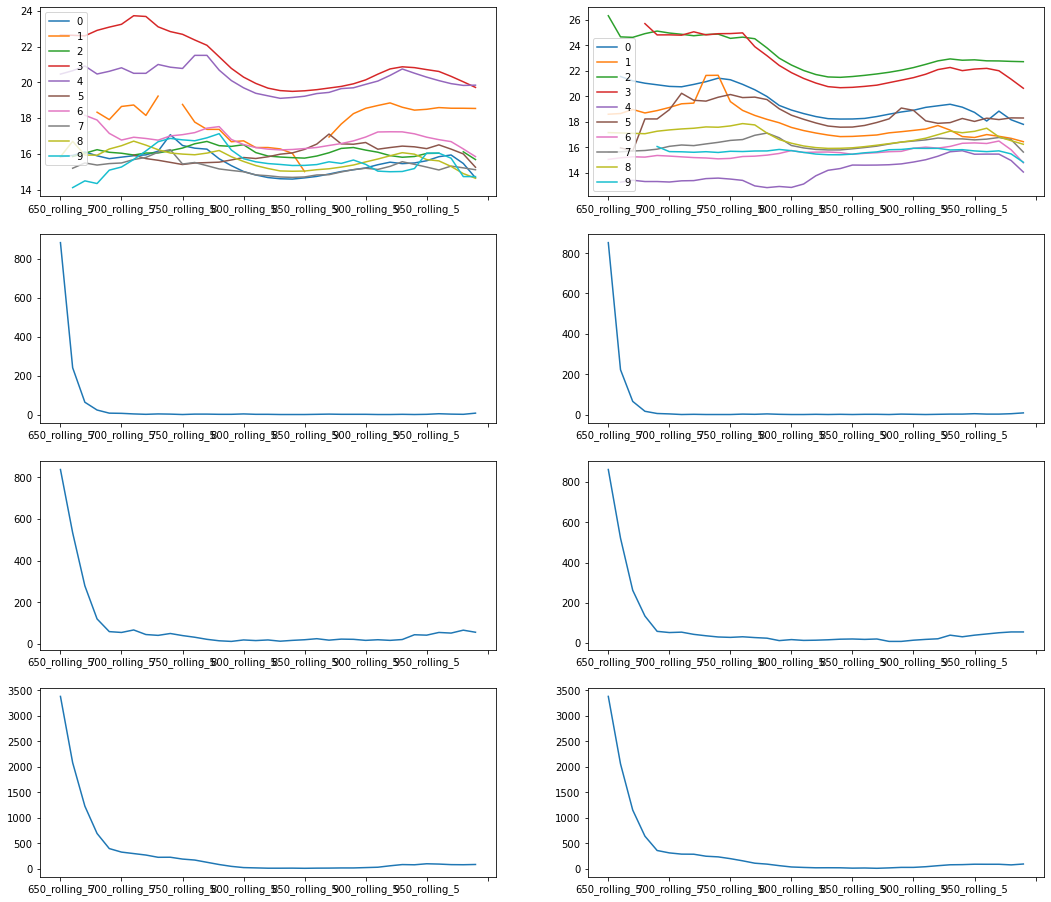

In [145]:
#롤링한 값을 다시 확인해 보자! 
figure, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)
i = 10

#전체 그래프를 그려라
train.filter(regex='_rolling_5$', axis='columns').head(i).T.plot(ax=ax1)
test.filter(regex='_rolling_5$', axis='columns').head(i).T.plot(ax=ax2)
#빈값만 찾아서 그려라
train.filter(regex='_rolling_5$', axis='columns').isna().sum().plot(ax=ax3)
test.filter(regex='_rolling_5$', axis='columns').isna().sum().plot(ax=ax4)
#-inf 값을 찾은 후 그려라 
train.filter(regex='_rolling_5$', axis='columns').isin([float('-inf')]).sum().plot(ax=ax5)
test.filter(regex='_rolling_5$', axis='columns').isin([float('-inf')]).sum().plot(ax=ax6)
#inf 값을 찾은 후 그려라 
train.filter(regex='_rolling_5$', axis='columns').isin([float('inf')]).sum().plot(ax=ax7)
test.filter(regex='_rolling_5$', axis='columns').isin([float('inf')]).sum().plot(ax=ax8)

<AxesSubplot:>

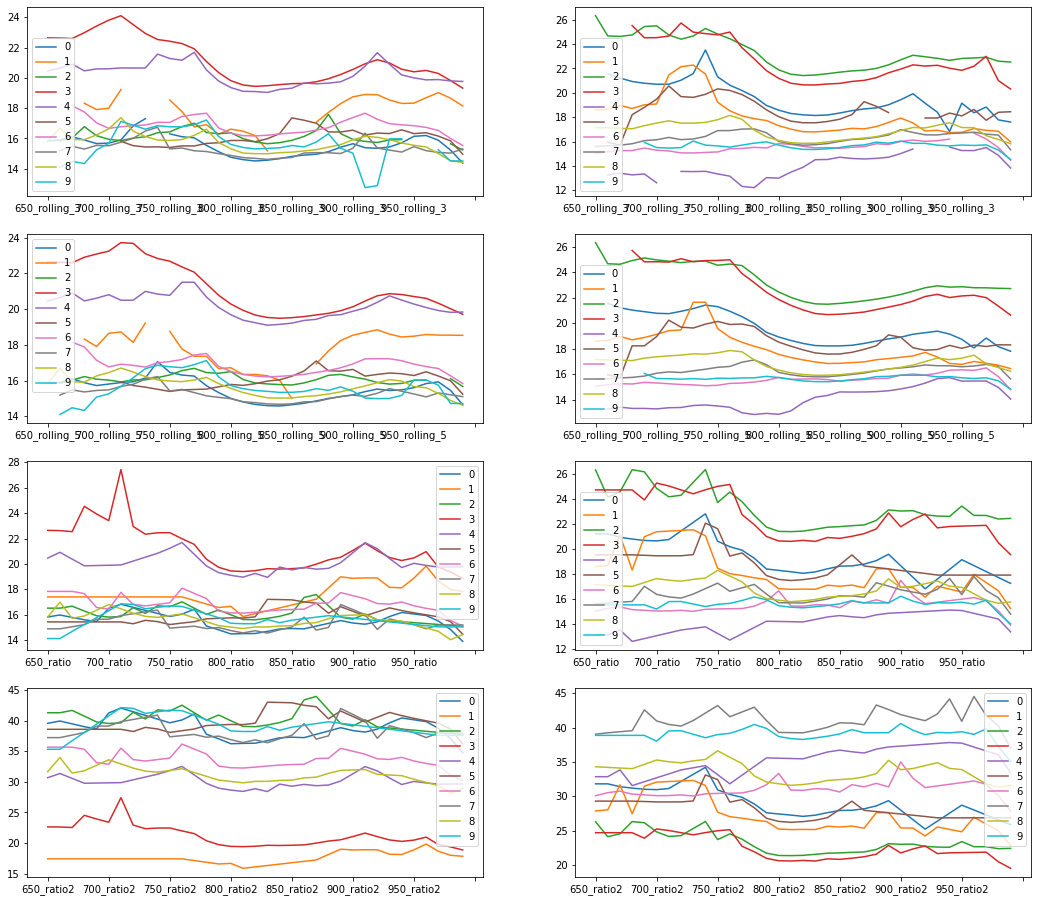

In [146]:
#롤링한 값을 다시 확인해 보자! 
figure, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)
i = 10


train.filter(regex='_rolling_3$', axis='columns').head(i).T.plot(ax=ax1)
test.filter(regex='_rolling_3$', axis='columns').head(i).T.plot(ax=ax2)

train.filter(regex='_rolling_5$', axis='columns').head(i).T.plot(ax=ax3)
test.filter(regex='_rolling_5$', axis='columns').head(i).T.plot(ax=ax4)

train.filter(regex='_ratio$', axis='columns').head(i).T.plot(ax=ax5)
test.filter(regex='_ratio$', axis='columns').head(i).T.plot(ax=ax6)
#inf 값을 찾은 후 그려라 
train.filter(regex='_ratio2$', axis='columns').head(i).T.plot(ax=ax7)
test.filter(regex='_ratio2$', axis='columns').head(i).T.plot(ax=ax8)

# 롤링한 값을 보간을 해보자!
# 1. rol3 (롤링 3번 한것) 컬럼부터 보간을 하여보도록 하자. 

In [147]:
#roll3
# 1. 무한을 빈값으로 변환해보자
train_rol3 = train.filter(regex='_rolling_3$', 
                          axis='columns').replace(float('-inf'),np.nan).replace(float('inf'),np.nan)
test_rol3 = test.filter(regex='_rolling_3$', 
                        axis='columns').replace(float('-inf'),np.nan).replace(float('inf'),np.nan)

# 2. 문자열 컬럼을 숫자 컬럼으로 변환해보장
train_rol3.columns = list(650 + 10*np.arange(35))
test_rol3.columns = list(650 + 10*np.arange(35))

# 3. 1차 보간을 해보장.
train_roll_3 = train_rol3.interpolate(method='linear', axis=1)
test_roll_3 = test_rol3.interpolate(method='linear', axis=1)

# 4. 숫자 컬럼을 다시 문자로 바꾸어 주장
train_roll_3.columns = train.filter(regex='_rolling_3$', axis='columns').columns
test_roll_3.columns = test.filter(regex='_rolling_3$', axis='columns').columns

# 5. 컬럼을 출력해보자. 
print(train_roll_3.columns)
print(test_roll_3.columns)

Index(['650_rolling_3', '660_rolling_3', '670_rolling_3', '680_rolling_3',
       '690_rolling_3', '700_rolling_3', '710_rolling_3', '720_rolling_3',
       '730_rolling_3', '740_rolling_3', '750_rolling_3', '760_rolling_3',
       '770_rolling_3', '780_rolling_3', '790_rolling_3', '800_rolling_3',
       '810_rolling_3', '820_rolling_3', '830_rolling_3', '840_rolling_3',
       '850_rolling_3', '860_rolling_3', '870_rolling_3', '880_rolling_3',
       '890_rolling_3', '900_rolling_3', '910_rolling_3', '920_rolling_3',
       '930_rolling_3', '940_rolling_3', '950_rolling_3', '960_rolling_3',
       '970_rolling_3', '980_rolling_3', '990_rolling_3'],
      dtype='object')
Index(['650_rolling_3', '660_rolling_3', '670_rolling_3', '680_rolling_3',
       '690_rolling_3', '700_rolling_3', '710_rolling_3', '720_rolling_3',
       '730_rolling_3', '740_rolling_3', '750_rolling_3', '760_rolling_3',
       '770_rolling_3', '780_rolling_3', '790_rolling_3', '800_rolling_3',
       '810_rolling

In [148]:
# 6. 2차 보간을 해보자! 
for i in range(34):
    train_roll_3.loc[train_roll_3[f'{980 - i*10}_rolling_3'].isna()
                     ,f'{980 - i*10}_rolling_3'] = train_roll_3.loc[train_roll_3[f'{980 - i*10}_rolling_3'].isna()
                                                                   ,f'{990 - i*10}_rolling_3']
    
    test_roll_3.loc[test_roll_3[f'{980 - i*10}_rolling_3'].isna()
                     ,f'{980 - i*10}_rolling_3'] = test_roll_3.loc[test_roll_3[f'{980 - i*10}_rolling_3'].isna()
                                                                   ,f'{990 - i*10}_rolling_3']

In [149]:
# 7. 값을 업데이트 해주자.
train.update(train_roll_3)
test.update(test_roll_3)

<AxesSubplot:>

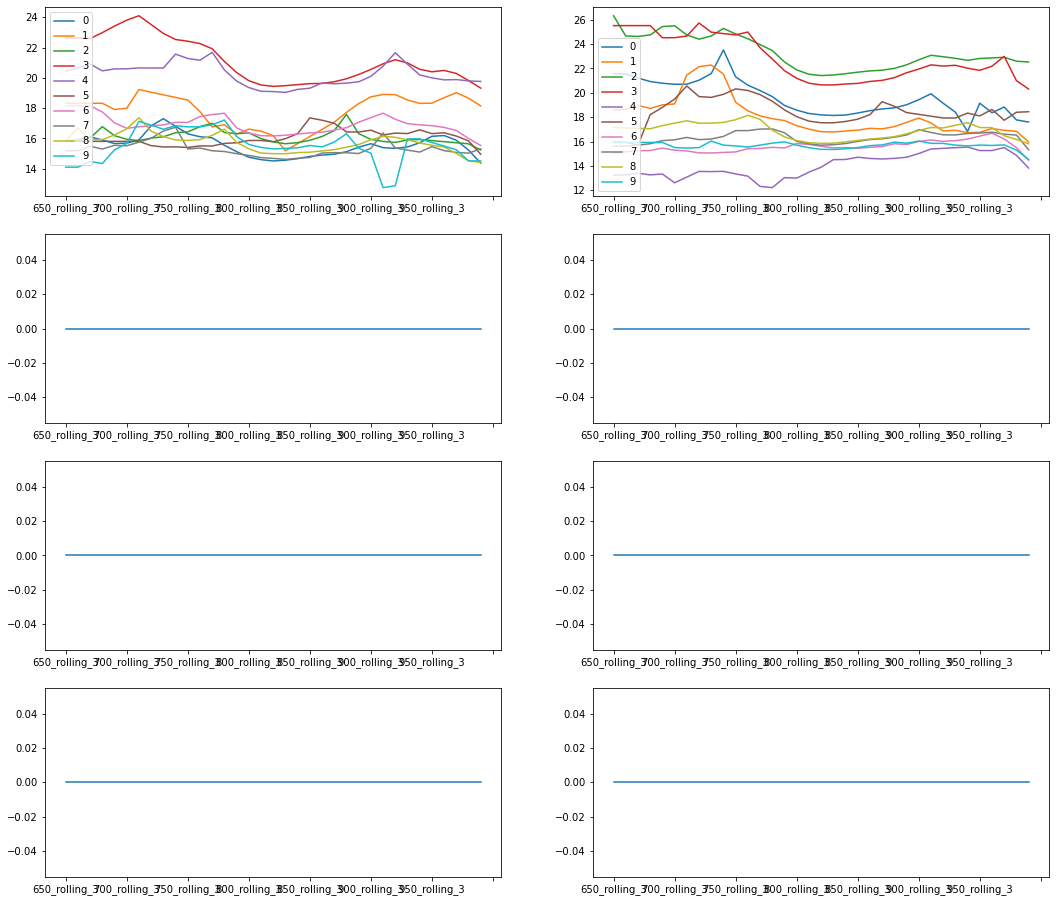

In [150]:
# 8. 최종 값을 다시 확인해 보자! 
figure, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)
i = 10

# 아래는 바뀐 값이 잘 바뀌었는지 가시화로 그래프화하여 확인하는 것. 실 데이터에는 영향없음. 
#전체 그래프를 그려라
train.filter(regex='_rolling_3$', axis='columns').head(i).T.plot(ax=ax1)
test.filter(regex='_rolling_3$', axis='columns').head(i).T.plot(ax=ax2)
#빈값만 찾아서 그려라
train.filter(regex='_rolling_3$', axis='columns').isna().sum().plot(ax=ax3)
test.filter(regex='_rolling_3$', axis='columns').isna().sum().plot(ax=ax4)
#-inf 값을 찾은 후 그려라 
train.filter(regex='_rolling_3$', axis='columns').isin([float('-inf')]).sum().plot(ax=ax5)
test.filter(regex='_rolling_3$', axis='columns').isin([float('-inf')]).sum().plot(ax=ax6)
#inf 값을 찾은 후 그려라 
train.filter(regex='_rolling_3$', axis='columns').isin([float('inf')]).sum().plot(ax=ax7)
test.filter(regex='_rolling_3$', axis='columns').isin([float('inf')]).sum().plot(ax=ax8)

##### rol3가 최종적으로 잘 보간되었음을 볼 수 있다. 

# 롤링한 값을 보간을 해보자!
# 2. rol5 (롤링 5번 한것) 컬럼 보간을 하여보도록 하자. 

In [182]:
# roll5
# 1. 무한을 빈값으로 변환 
train_rol5 = train.filter(regex='_rolling_5$', 
                          axis='columns').replace(float('-inf'),np.nan).replace(float('inf'),np.nan)
test_rol5 = test.filter(regex='_rolling_5$', 
                        axis='columns').replace(float('-inf'),np.nan).replace(float('inf'),np.nan)

# 2. 문자열 컬럼을 숫자 컬럼으로 변환
train_rol5.columns = list(650 + 10*np.arange(35))
test_rol5.columns = list(650 + 10*np.arange(35))

# 3. 1차 보간 - 빈값을 직선화 하여 1차적으로 채워보자(양끝값이 있는 경우에만 가능) / 컬럼이름이 숫자여야 가능
train_roll_5 = train_rol5.interpolate(method='linear', axis=1)
test_roll_5 = test_rol5.interpolate(method='linear', axis=1)

# 4. 숫자 컬럼을 다시 문자로 (헷갈리니까)
train_roll_5.columns = train.filter(regex='_rolling_5$', axis='columns').columns
test_roll_5.columns = test.filter(regex='_rolling_5$', axis='columns').columns

# 5. 컬럼을 출력하여 확인해보자~
print(train_roll_5.columns)
print(test_roll_5.columns)

ValueError: Length mismatch: Expected axis has 0 elements, new values have 35 elements

In [152]:
# 6. 2차 보간을 해보자! - 양끝 중 하나라도 없는 친구들은 빈값으로 남게 되므로 
#                         그런 친구들을 그 앞 컬럼에서 값을 땡겨와 쓰도록

for i in range(34):
    train_roll_5.loc[train_roll_5[f'{980 - i*10}_rolling_5'].isna()
                     ,f'{980 - i*10}_rolling_5'] = train_roll_5.loc[train_roll_5[f'{980 - i*10}_rolling_5'].isna()
                                                                   ,f'{990 - i*10}_rolling_5']
    
    test_roll_5.loc[test_roll_5[f'{980 - i*10}_rolling_5'].isna()
                     ,f'{980 - i*10}_rolling_5'] = test_roll_5.loc[test_roll_5[f'{980 - i*10}_rolling_5'].isna()
                                                                   ,f'{990 - i*10}_rolling_5']

In [153]:
# 7. 값을 업데이트 해주자.
train.update(train_roll_5)
test.update(test_roll_5)

<AxesSubplot:>

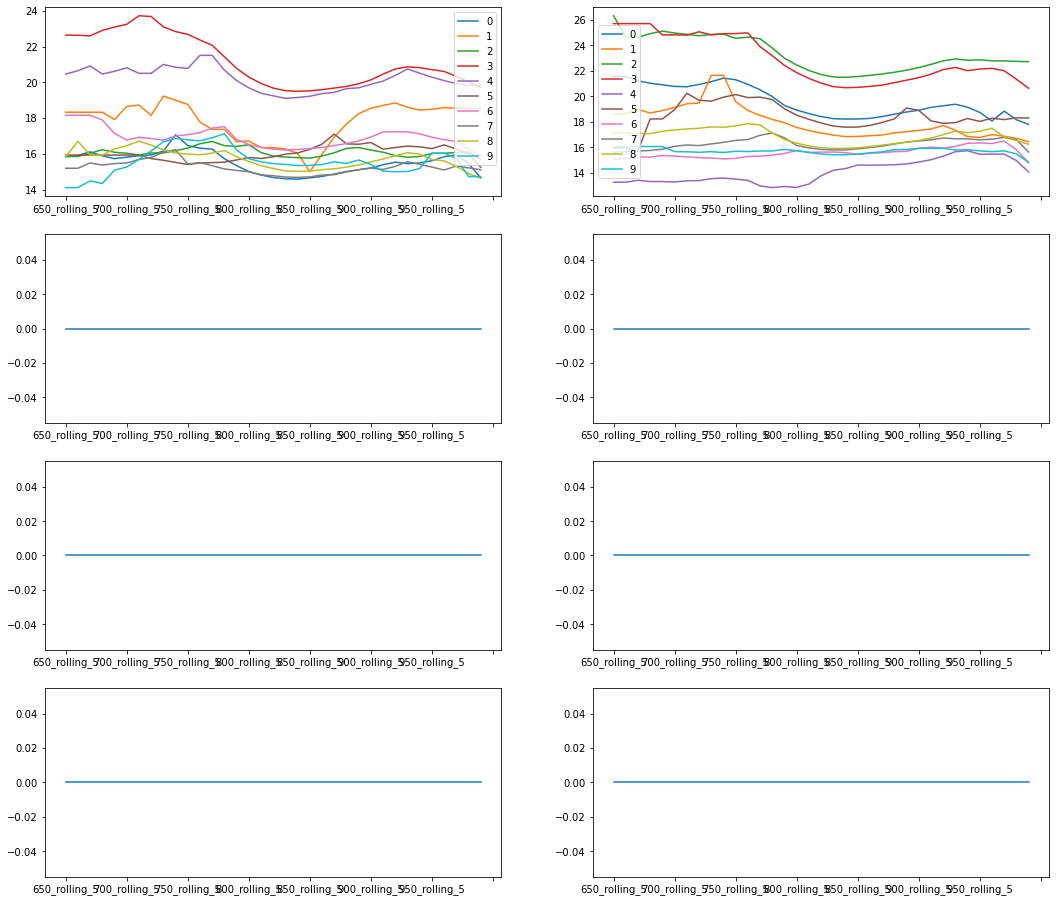

In [154]:
# 8. 최종 값을 다시 확인해 보자! 
figure, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)
i = 10

# 아래는 바뀐 값이 잘 바뀌었는지 가시화로 그래프화하여 확인하는 것. 실 데이터에는 영향없음. 
#전체 그래프를 그려라
train.filter(regex='_rolling_5$', axis='columns').head(i).T.plot(ax=ax1)
test.filter(regex='_rolling_5$', axis='columns').head(i).T.plot(ax=ax2)
#빈값만 찾아서 그려라
train.filter(regex='_rolling_5$', axis='columns').isna().sum().plot(ax=ax3)
test.filter(regex='_rolling_5$', axis='columns').isna().sum().plot(ax=ax4)
#-inf 값을 찾은 후 그려라 
train.filter(regex='_rolling_5$', axis='columns').isin([float('-inf')]).sum().plot(ax=ax5)
test.filter(regex='_rolling_5$', axis='columns').isin([float('-inf')]).sum().plot(ax=ax6)
#inf 값을 찾은 후 그려라 
train.filter(regex='_rolling_5$', axis='columns').isin([float('inf')]).sum().plot(ax=ax7)
test.filter(regex='_rolling_5$', axis='columns').isin([float('inf')]).sum().plot(ax=ax8)

In [155]:
#최종적으로 실행한 것들을 확인해보자. 

In [228]:
#컬럼 정리 
Xtrain = train.drop(['id','hhb','hbo2','ca','na'], axis='columns')
Xtest = test.drop(['id'], axis='columns')
Ytrain = train[['hhb','hbo2','ca','na']]

In [229]:
#LGBM 선형회귀 머신러닝 / 변수 설정 랜덤
base_model = LGBMRegressor(random_state=18)
#멀티모델 왜? 라벨이 2개이상이니 LGBM 혼자 처리를 못해준다. 
#고로 위에서 만든놈을 넣어서 멀티 모델을 만들어 준다. 
multi_model = MultiOutputRegressor(base_model)

In [230]:
#멀티 모델로 계산한 값을 누적 시킬곳을 만들어 줌.
y_pred = np.zeros((len(Xtest),4))
x_pred = np.zeros((len(Xtrain),4))
result = 0 
n_splits = 5  #K가 몇개인가?

#kfold는 k개의 폴드를 만들어 교차 검증한다.

# ex) k가 5일때 
# 데이터를 5등분 하여 1번을 검증(validation data)용이라 하고 나머지 2~5를 학습데이터라 한다면. 
# 각각 1번이 검증, 2번이 검증,..5번이 검증데이터가 되도록 5번의 검증을 거쳐 5개의 모델을 만드는  것.
# 셔플은 데이터를 랜덤하게 가져온는 것. ex)20%데이터를 검증, 80%을 학습 하되 랜덤하게. true / false는 그냥 짤라서 블럭화 후.
# random_state 값을 지정해주는 이유-> 지정하지않으면 값이 항상 바뀌어 일관성이 떨어지게됨. 아무 숫자나 넣어주라. 
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
#k등분할 데이터를 Xtrain자리에 넣어서 
for n_fold, (trn_idx, val_idx) in enumerate(kf.split(Xtrain)):
    
    #iloc은 인덱스 행 지정해주려고. 
    trn_x, trn_y = Xtrain.iloc[trn_idx], Ytrain.iloc[trn_idx]
    val_x, val_y = Xtrain.iloc[val_idx], Ytrain.iloc[val_idx]
    
    #멀티모델 학습
    multi_model.fit(trn_x, trn_y)
    
    #트레인으로 학습 후, Xtest에 적용하는 단계
    #for문 반복 마다 값이 누적 되도록.
    y_pred += multi_model.predict(Xtest) / n_splits #y_pred-> 테스트할 값의 예상값
     
    x_pred += multi_model.predict(Xtrain) / n_splits #x_pred->학습 값이 맞는지 확인.
    
    val_pred = multi_model.predict(val_x)
    
    result += np.mean((np.abs(val_y - val_pred))) / n_splits #거리 데이터의 평균. 
    
    print(result)

hhb     0.118374
hbo2    0.092692
ca      0.291841
na      0.214347
dtype: float64
hhb     0.245768
hbo2    0.187698
ca      0.580133
na      0.427749
dtype: float64
hhb     0.373621
hbo2    0.283399
ca      0.872844
na      0.643588
dtype: float64
hhb     0.502206
hbo2    0.380260
ca      1.156083
na      0.868903
dtype: float64
hhb     0.628820
hbo2    0.476840
ca      1.446302
na      1.082703
dtype: float64


In [231]:
result.mean() 

0.9086663670070754

## 머신러닝의 이해!

In [ ]:
#앙상블
#배깅은 거의 사용하지 않고 부스팅이 거의 대부분 사용된다. 

![앙상블](앙상블.jpg)

In [ ]:
#배깅과 부스팅 

![bagging과boosting](bagging과boosting.jpg)

In [ ]:
#gbm원리  부스팅의 하부구조 clssifier=>tree 
#배깅이라면 각각 따로 실행
#부스팅은
#   원본 데이터는 Ground truth
#Ex)tree1 해석 평균적으로 각 점들의 오차를 가장 줄이는 방향으로 반복하여 최적화 한다.(그림2) 
#   tree2 tree 1의 직각 부분을 펼쳐서 선으로 만든다.  그 후 새로운 선을 그려 오차를 줄이는 선을 긋는다.(그림3)
#   tree3은 tree2를 또다시 직선화 하여 새로운 선을 그린다. 
#   모델 수를 늘릴 수록 평탄화 됨. 

#   모델 수가 늘어 날수록 성능 증진량이 줄어듬. 

![gbm원리](gbm원리.jpg)

In [ ]:
# tree! 모델이 늘어나면 변화되는 모습
# 딥러닝과 머신러닝은 학습방식이 완전히 다르다

# iterations => 학습 횟수(원래 머신러닝에서는 학습 횟수라는 것이 없음. 사실 모델 갯수를 말하는 것.)
# iterations => n estinator
# 모델 갯수가 늘어 날 수록 에러가 줄어 든다.
# 이게 무슨 의미인가??? -> Early stopping(모니터링) 일정 모델 갯수마다 에러가 줄어듬
# learning rate(학습률) -> 머신러닝에서 러닝레이트는 각 모델의 기여도를 몇 %로 설정할 것인가 임.
# 모델이 늘어 날 수록 러닝레이트가 줄여지는 것이 좋다. 
# 모델 구조 자체를 늘려서 머신러닝하는 이것을 앙상블 구조라 한다. 

# 딥러닝과 매우 차이남. 

![tree](tree.jpg)

#hyperparameter : 개발자가 튜닝하는 값.
#default 값.
MultiOutputRegressor(estimator=LGBMRegressor(boosting_type='gbdt',
                                             colsample_bytree=1.0,
                                             learning_reat=0.1, max_depth=-1,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             reg_alpha=0.0,
                                             reg_lambda=0.0,
                                             subsample=1.0)

#boosting type -> gbdt-95%(
                  dart-4.9%( ) 트리를 뺌. ex) 트리 10000개 중에 약 1000개 정도를 랜덤하게 뺌. -과적합방지.
                  goss(gradient-based one-side sampling) 증감률 기반 단측 샘플링 / 학습속도를 높이는 목적. 성능 X 
                  rf(Random forest) /분류 할 떄씀   요즘은 거의 안씀 

#colsample_bytree=1.0,   => 1.0 이면 100%쓰겟다 . 0.7은 70%만 쓰겟다. 
#과적합을 줄여준다. 너무 줄인다면 학습이 제대로 되지 않는다.
#보통 0.7~1 사이 값을 설정. 행데이터를 빼먹음
 
#subsample => 0.7~1 값 사용.  콜샘플과 반대.  행데이터를 빼먹음

#max_depth => 트리의 깊이, 트리모델이 몇단계인지 / -1은 깊이 무한대를 의미. 

#LGBM에서는 트리깊이와 leaf간 상간관계가 있다.
#ex) 2^max_depth - 1 = leaf의 최대 수(num_leaves)

GBM에는 2가지 종류가 있음

XGBOOST와 LIGHTGBM!

XGBOOST는 대칭형 모델구조를 가진다! / 쓰레기 모델도 모양을 맞추기 위해 모두 포함하여 모델 구조 생성.
무겁고 학습이 느림. 

lightGBM은 비대칭형 모델구조를 허용한다! / 쓰레기 모델은 버리고 좋은 쪽만 택해서 모델 구조 생성.
가볍고 학습이 빠름. / 대부분의 경우 LGBM이 좀더 결과 값이 좋다.

*CATBOOST는 2019년에 만들어 졌으며, one-hot-encoding에서 많이 사용된다. (컬럼수가 많을 때)
학습 속도가 LGBM에 비해 매우 느리다. 

https://lightgbm.readthedocs.io/en/latest/Parameters.html

objective

regression(회귀분석) - 자전거 대여 시간, 몇 대 대여/ 리그레션에도 종류가 다양. 
                L2 : MSE(Mean Squared Error) =>평균 제곱 오차 
                ex) d^2의 평균, d의 평균은 MAE=>L1 
                
classification(분류분석) - 타이타닉, 생존 1, 0 

binary

multi-class 

In [ ]:
#데이터 넣는 방법은 위 처럼 직접 넣는 방법도 있고 다른 방법도 있음. 

base_params = {'learning_rate' : 0.0188,
               'max_depth':-1, #tree의 깊이 제한이 없음
               'num_leaves':80,
               'n_estimators':1000,
               'colsample_bytree':0.8,
               'subsample': 0.9
               'reg_alpha':1,
               'reg_lambda':1
              }

base_model=LGBMRegressor(objective='regression', random_state=18, **base_params)

multi_mode=MultiOutputRegressor(base_model1)

2개의 하이퍼 파라미터에서 reg값은 무엇인가?
reg -> 저항! 과적합 방지를 위해 사용되는 값이다!.
데이터가 과 적합 된다면 지그재그로 그래프가 생성됨. / reg는 과적합 방지 및 좀더 완화된 데이터 값을 얻기위해.

reg-alpha => L1 일차함수 + a|X|    // a가 reg_alpha
reg-lambda => L2 이차함수 + aX^2   // a가 reg_lambda

이번에는 hno2, hhb, ca Na 에 대하여 각각 학습 시켜 보도록 하자. 
위에서 말한 대로! 

In [232]:
y_pred

array([[ 8.54776641,  4.98596247,  9.8689719 ,  2.78310981],
       [ 8.9574606 ,  2.61150859,  8.05022189,  3.12214539],
       [ 9.51682539,  4.90686461, 11.17559083,  3.63619641],
       ...,
       [ 7.52221235,  4.39997043,  9.26937066,  3.40499291],
       [13.21251647,  4.42451958,  9.09351195,  4.05791726],
       [ 3.45553769,  5.26460691, 11.6043363 ,  2.60811356]])

In [233]:
x_pred

array([[ 6.00987233,  4.4351049 ,  8.38305553,  3.62880157],
       [ 0.93631234,  2.97360686,  7.87378439,  4.05845941],
       [10.60492809,  3.4276182 ,  8.64961255,  3.10715515],
       ...,
       [ 9.89288646,  3.38815922,  9.70130826,  1.20790289],
       [ 6.19077623,  4.02868005, 11.8494241 ,  4.53277356],
       [10.00311831,  3.6501421 ,  9.66408882,  3.84433988]])

In [234]:
#1. 일단 컬럼을 만들어주자! 

In [235]:
Xtrain['probe_hhb'] = x_pred[:,0]
Xtrain['probe_hbo2'] = x_pred[:,1]
Xtrain['probe_ca'] = x_pred[:,2]
Xtrain['probe_na'] = x_pred[:,3]

Xtrain[['probe_hhb','probe_hbo2','probe_ca','probe_na']].head()

,probe_hhb,probe_hbo2,probe_ca,probe_na
0,6.009872,4.435105,8.383056,3.628802
1,0.936312,2.973607,7.873784,4.058459
2,10.604928,3.427618,8.649613,3.107155
3,5.458044,3.992955,4.794532,4.406972
4,11.186936,4.577887,9.493096,3.271596


In [236]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 215 entries, rho to probe_na
dtypes: float64(214), int64(1)
memory usage: 16.4 MB


In [237]:
Xtest['probe_hhb'] = y_pred[:,0]
Xtest['probe_hbo2'] = y_pred[:,1]
Xtest['probe_ca'] = y_pred[:,2]
Xtest['probe_na'] = y_pred[:,3]

Xtest[['probe_hhb','probe_hbo2','probe_ca','probe_na']].head()

,probe_hhb,probe_hbo2,probe_ca,probe_na
0,8.547766,4.985962,9.868972,2.783110
1,8.957461,2.611509,8.050222,3.122145
2,9.516825,4.906865,11.175591,3.636196
3,8.317401,3.974369,9.428446,4.346975
4,6.356773,3.048450,9.253524,2.771601


In [238]:
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 215 entries, rho to probe_na
dtypes: float64(214), int64(1)
memory usage: 16.4 MB


이전에 햇던것과 비교해보자! 

In [239]:
# y_pred의 빈창고 
sub = pd.read_csv('sample_submission.csv', index_col='id')
sub.head()

,hhb,hbo2,ca,na
id,,,,
10000,0,0,0,0
10001,0,0,0,0
10002,0,0,0,0
10003,0,0,0,0
10004,0,0,0,0


In [240]:
#Xpred result를 받아주는 역할.  / 멀티를 사용하지 못하고 따로 계산해주어야 하므로.
#ypred때와 달리 새로 데이터 프레임을 만들어 주자! 

order = [[0,0,0,0]]
columns = [Ytrain.columns[0],Ytrain.columns[1],Ytrain.columns[2],Ytrain.columns[3]]
output = pd.DataFrame(order,columns=columns)
output

,hhb,hbo2,ca,na
0,0,0,0,0


In [244]:
for col in range(4):
    # hhb, hbo2, ca, na 순으로 컬럼을 Ytrain_temp에 하나만 저장함.
    Ytrain_temp = Ytrain[Ytrain.columns[col]].copy()
    
    y_pred = np.zeros(len(Xtest))
    x_label = np.zeros(len(Xtrain))
    result = 0
    n_splits = 5
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    Xtrain_f = Xtrain.drop(['probe_'+Ytrain.columns[col]],axis=1)
    Xtest_f = Xtest.drop(['probe_'+Ytrain.columns[col]],axis=1)
              
    for n_fold, (trn_idx, val_idx) in enumerate(kf.split(Xtrain_f)):
        trn_x, trn_y = Xtrain_f.iloc[trn_idx], Ytrain_temp.iloc[trn_idx]
        val_x, val_y = Xtrain_f.iloc[val_idx], Ytrain_temp.iloc[val_idx]
    
        # 모델의 튜닝조건
        model= lgb.LGBMRegressor(boosting_type='gbdt',n_estimators=10000, num_leaves=80, max_depth=-1,
                                 subsample=0.9, colsample_bytree=0.8, learning_rate=0.0188,
                                 reg_alpha=1, reg_lambda=1)
        # 모델의 학습
        model.fit(trn_x, trn_y, eval_set=[(trn_x, trn_y),(val_x, val_y)],
                 early_stopping_rounds=100, verbose=-1, eval_metric='mae')
        
        y_pred += model.predict(Xtest_f) / n_splits 
        x_label += model.predict(Xtrain_f) / n_splits 
        val_pred = model.predict(val_x)
        result += np.mean((np.abs(val_y - val_pred))) / n_splits     
        print(result)
    sub[Ytrain.columns[col]] = y_pred
    output[Ytrain.columns[col]] = result
sub     

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[2934]	training's l1: 0.0203885	training's l2: 0.000733528	valid_1's l1: 0.505168	valid_1's l2: 0.56791
0.10103365367179844
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[3147]	training's l1: 0.0190196	training's l2: 0.000639744	valid_1's l1: 0.537959	valid_1's l2: 0.672606
0.20862549505694689
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[3090]	training's l1: 0.0192773	training's l2: 0.000664188	valid_1's l1: 0.530614	valid_1's l2: 0.701133
0.3147483417407263
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[3127]	training's l1: 0.0192181	training's l2: 0.000663898	valid_1's l1: 0.541128	valid_1's l2: 0.66254
0.42297395065687926
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[3070]	training's 

,hhb,hbo2,ca,na
id,,,,
10000,8.471967,5.068102,9.496638,2.679851
10001,8.706356,2.653516,7.991441,2.780874
10002,9.644736,5.069636,10.560233,3.653002
10003,8.324859,3.981035,9.391212,4.522319
10004,6.807045,2.917286,9.803274,2.824521
...,...,...,...,...
19995,3.884660,4.597774,11.453122,5.174684
19996,10.608222,2.844927,8.007888,2.848317
19997,7.828042,4.281410,9.770406,3.511420


In [245]:
output.loc[0].mean()

0.8403626242006447

In [247]:
sub.to_csv('20210826 Junbal')

# Hyperparameters

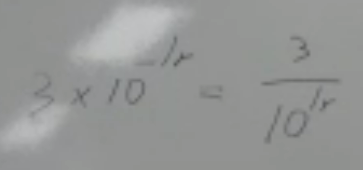

In [251]:
# 브로드한 하이퍼 파라메타 ( 브로우 한건 결과가 좋지 않을 수 있다. 대신 범위를 좁혀가면서 좋은 값을 찾아간다 )
coarse_hyperparameters_list = []

# 100개 중 랜덤으로 튜닝을 해서 값을 추출한다. (복불복)
# num_epoch = 100~1000 등 다양하게 tunning 함.
num_epoch = 100

for epoch in range(num_epoch):
    
    #n_estimators = np.random.randint(low = 100, high = 9000)
    max_depth = np.random.randint(low = -1, high = 30)
    
    # 과적합을 방지하기 위해 절반으로 줄여준다.
    leaves = np.random.randint(low = 1, high = 14)
    num_leaves = (2**leaves)-1
        
    # 랜덤으로 1 ~ 4 사이의 값이 나온다.
    lr = np.random.uniform(low = 1, high = 4)
    learning_rate = 3*(10**(-lr))
    
    colsample_bytree = np.random.uniform(low=0.4, high=1)
    subsample = np.random.uniform(low=0.4,high=1)
    
    r_alpha = np.random.uniform(low=0, high = 100)
    r_lambda = np.random.uniform(low=0, high = 100)
    
    for col in range(4):
        # hhb, hbo2, ca, na 순으로 컬럼을 Ytrain_temp에 하나만 저장함.
        Ytrain_temp = Ytrain[Ytrain.columns[col]].copy()

        y_pred = np.zeros(len(Xtest))
        x_label = np.zeros(len(Xtrain))
        result = 0
        n_splits = 5
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

        Xtrain_f = Xtrain.drop(['probe_'+Ytrain.columns[col]],axis=1)
        Xtest_f = Xtest.drop(['probe_'+Ytrain.columns[col]],axis=1)

        for n_fold, (trn_idx, val_idx) in enumerate(kf.split(Xtrain_f)):
            trn_x, trn_y = Xtrain_f.iloc[trn_idx], Ytrain_temp.iloc[trn_idx]
            val_x, val_y = Xtrain_f.iloc[val_idx], Ytrain_temp.iloc[val_idx]

            # 모델의 튜닝조건
            model= lgb.LGBMRegressor(boosting_type = 'gbdt', n_estimators=10000, num_leaves=num_leaves, max_depth=max_depth,
                                     subsample=subsample, colsample_bytree=colsample_bytree, learning_rate=learning_rate,
                                     r_alpha=r_alpha, r_lambda=r_lambda)
            # 모델의 학습
            model.fit(trn_x, trn_y, eval_set=[(trn_x, trn_y),(val_x, val_y)],
                     early_stopping_rounds=100, verbose=-1, eval_metric='mae')

            y_pred += model.predict(Xtest_f) / n_splits 
            x_label += model.predict(Xtrain_f) / n_splits 
            val_pred = model.predict(val_x)
            result += np.mean((np.abs(val_y - val_pred))) / n_splits     
            #print(result)
        sub[Ytrain.columns[col]] = y_pred
        output[Ytrain.columns[col]] = result
        
    # output = result 값 중 평균을 score에 넣는다.
    scores = output.loc[0].mean()

    hyperparameters = {
        'epoch' : epcoh,
        'scores' : scores,
        'lr' : lr,
        'num_leaves' : leaves,
        'max_depth' : max_depth,
        'n_estimators' : 10000,
        'colsample_bytree' : colsample_bytree,
        'subsample' : subsample,
        'num_iterations' : num_iterations,
        'reg_alpha' : r_alpha,
        'reg_lambda' : r_lambda,
    }

    # 추출 된 데이터를 List 안에 넣는다 ( EPOCH 0~ 100 범위)
    coarse_hyperparameters_list.append(hyperparameters)

    # 2 는 100단위, .4f 는 소수점으로 나온다.
    print(f"{epoch:2} scores={scores:.4f}, lr={lr:.4f}, leaves={leaves:2}, max_depth={max_depth:2}, colsample_bytree={colsample_bytree:.4f}, subsample={subsample:.4f}, r_alpha={r_alpha:.4f}, r_lambda={r_lambda:.4f}")

# 리스트를 데이터프레임으로 만들고
coarse_hyperparameters_dataframe = pd.DataFrame = pd.DataFrame.from_dict(coarse_hyperparameters_list)

# 정렬시킨다. 스코어가 가장 낮은 순으로
coarse_hyperparameters_dataframe = coarse_hyperparameters_dataframe.sort_values(by="scores")
print(coarse_hyperparameters_dataframe.shape)
# 상위 10위를 뽑겠다
coarse_hyperparameters_dataframe.head(10)

[LightGBM] [Warning] Unknown parameter: r_alpha
[LightGBM] [Warning] Unknown parameter: r_lambda
Training until validation scores don't improve for 100 rounds


KeyboardInterrupt: 